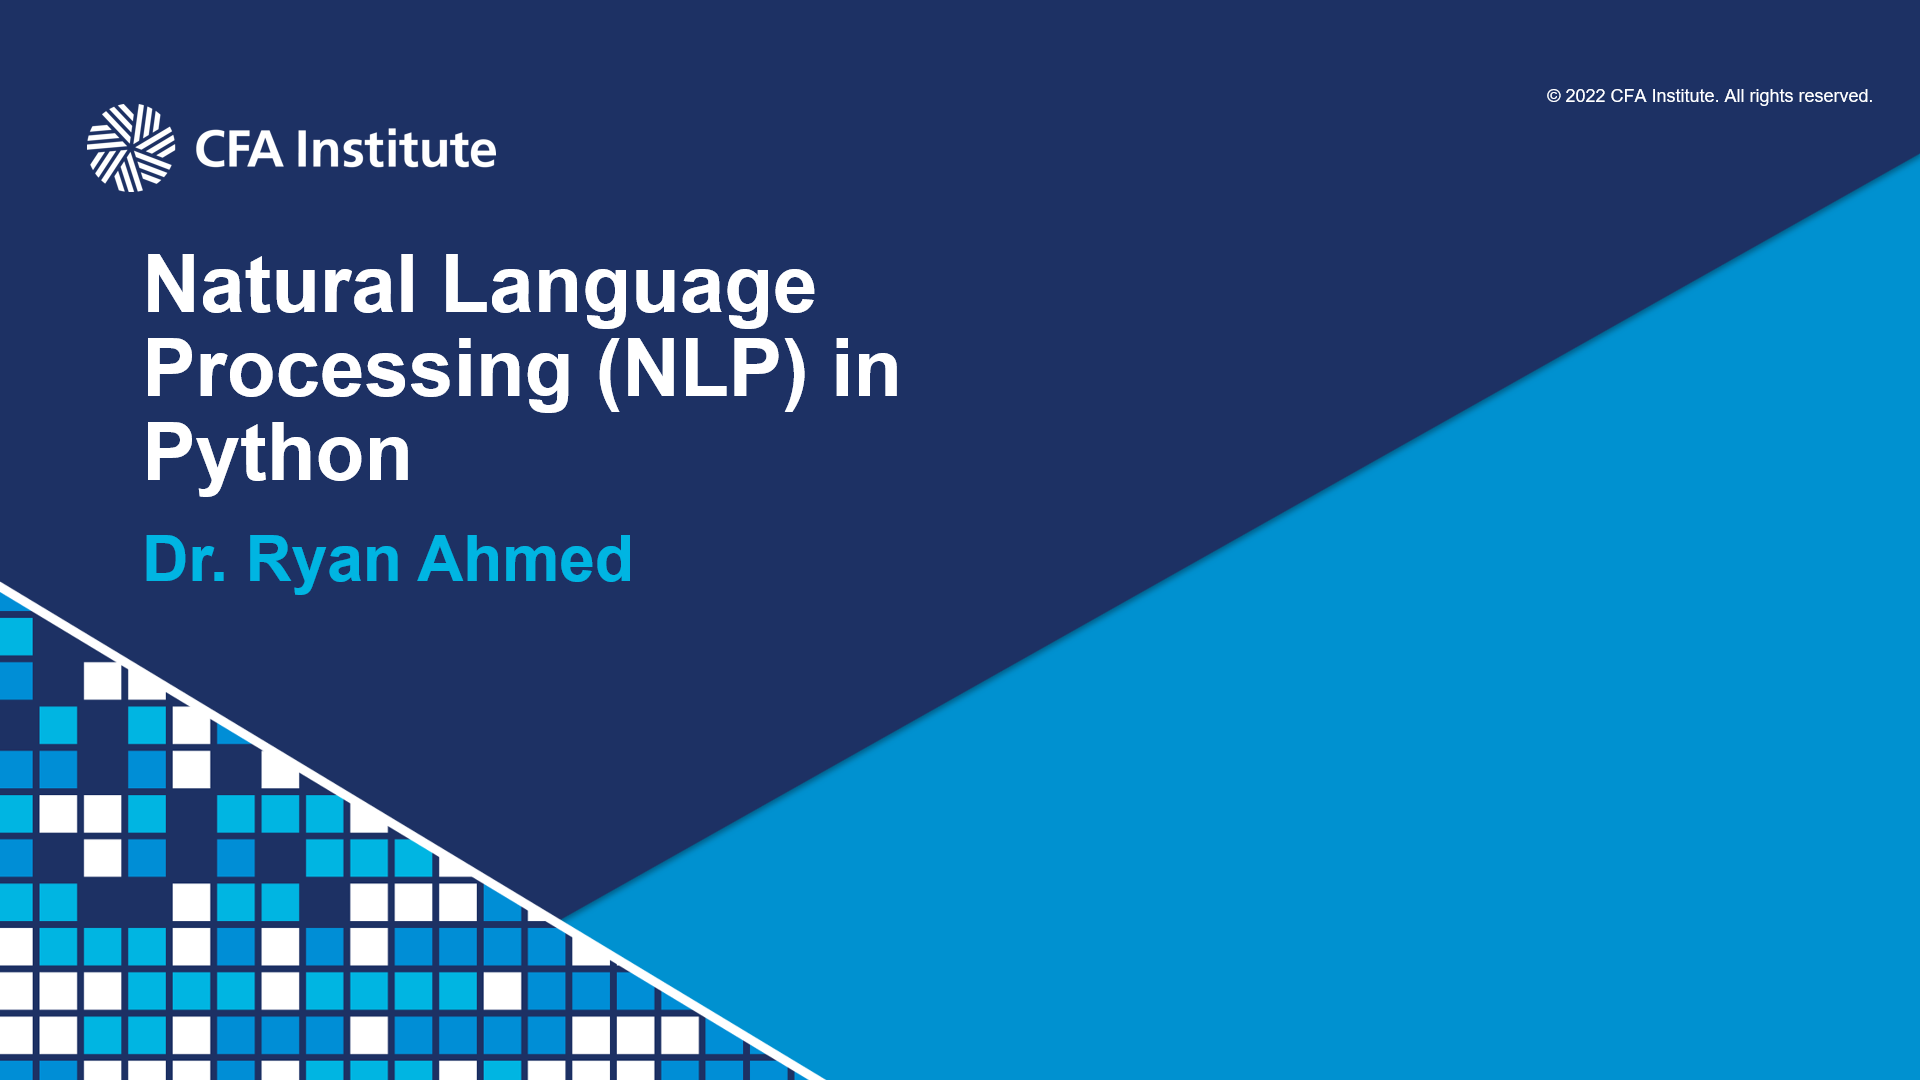

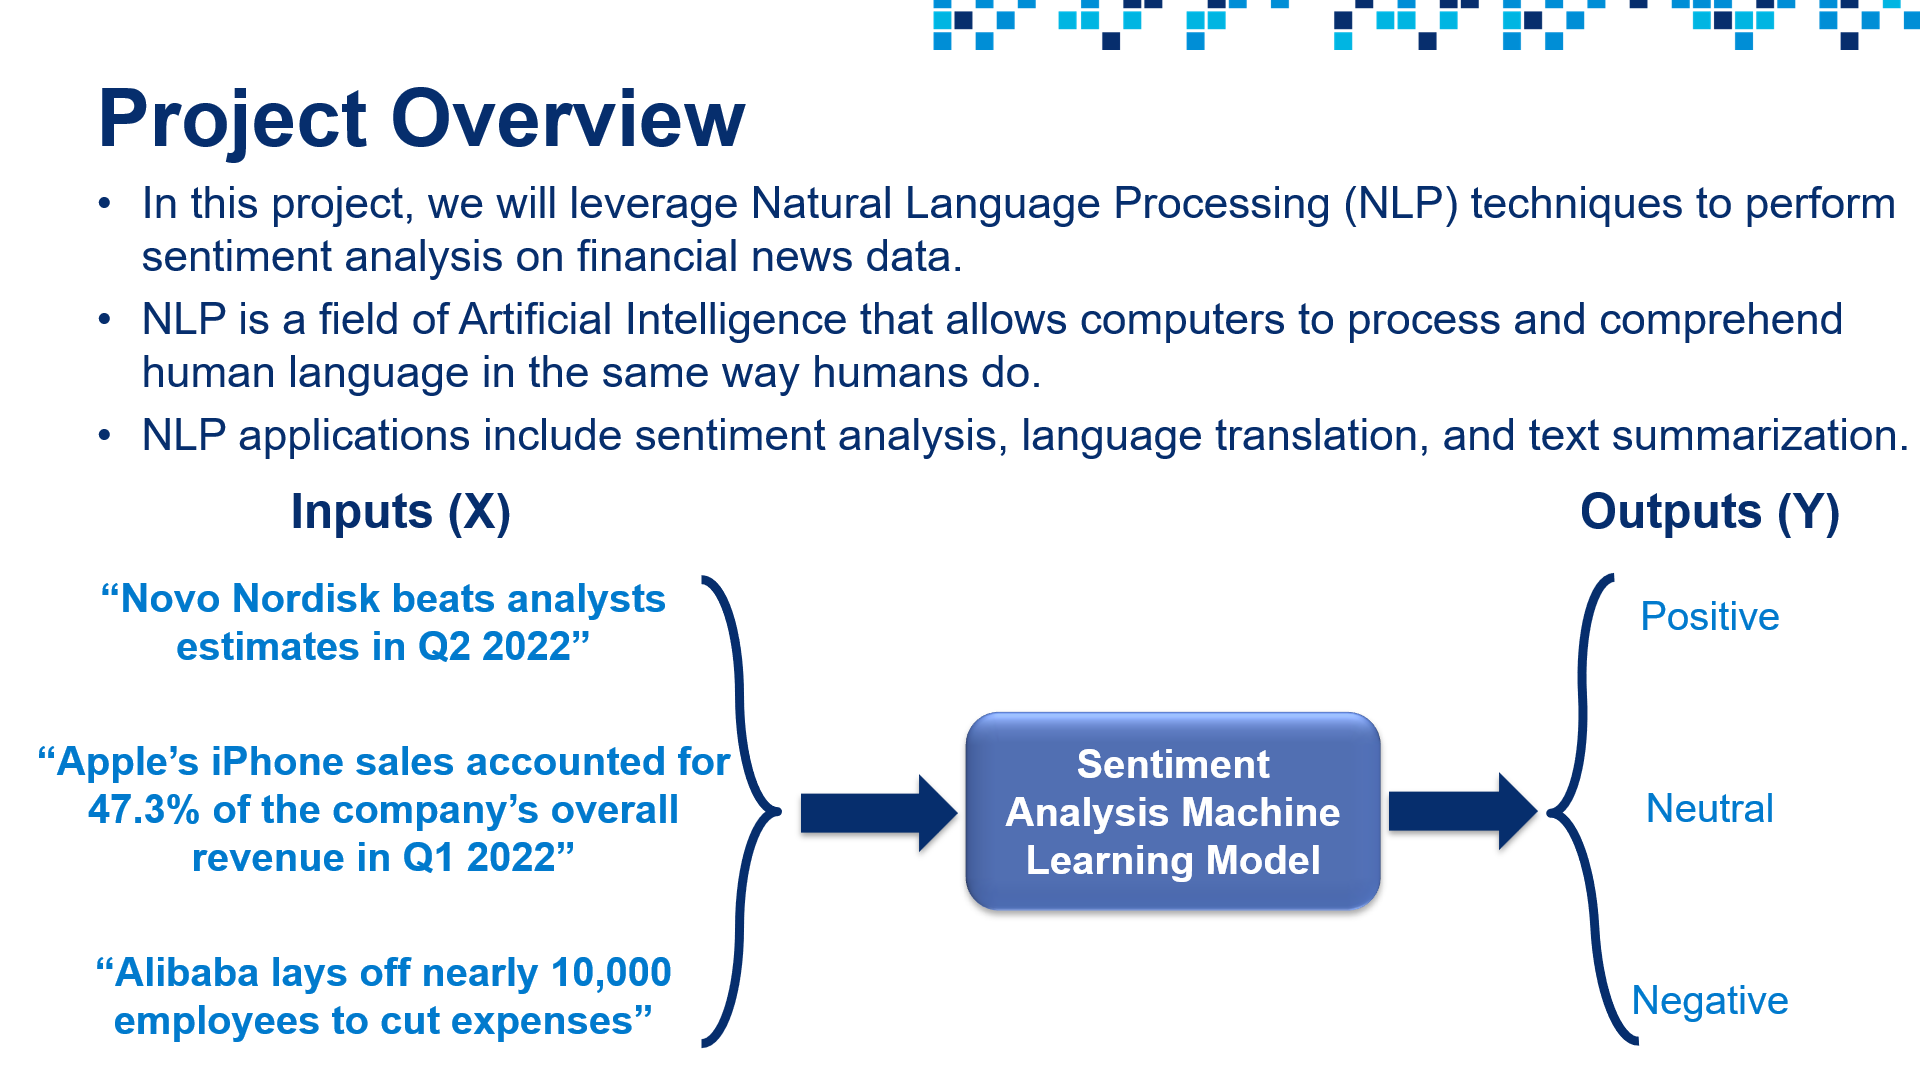

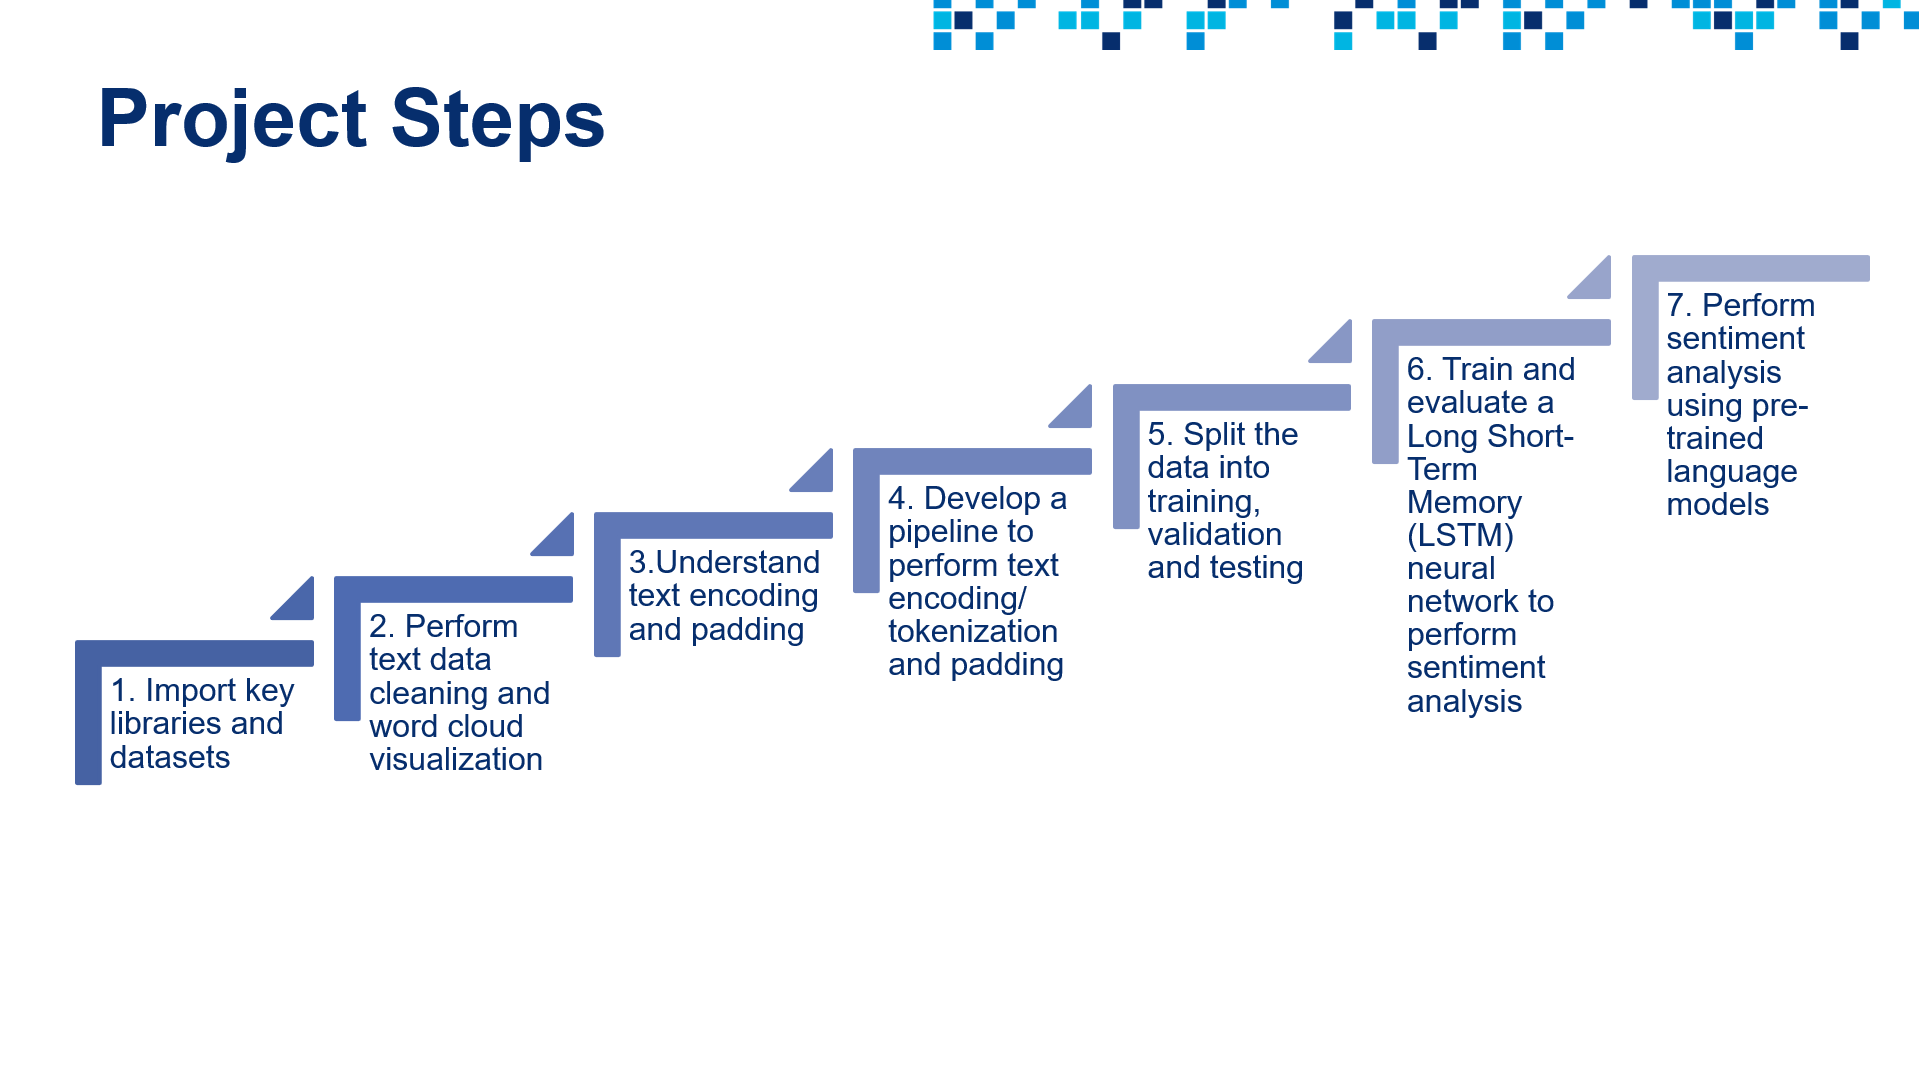

# IMPORT AND EXPLORE THE DATA

In [ ]:
# NLTK (Natural Language Toolkit) is a Python package that is used for Natural Language Processing (NLP)
!pip install nltk

In [ ]:

# Import NLTK library 
import nltk


In [ ]:
# Pandas is a data manipulation and analysis tool that uses a data structure known as DataFrame
# DataFrames empower programmers to store and manipulate data in a tabular fashion (rows & columns)
# Import Pandas Library into the current environment, note that "pd" is an alias of "Pandas" 
import pandas as pd 

In [ ]:
# Pandas is used to read a csv file and store data in a DataFrame
df = pd.read_csv('financial_news.csv')

In [ ]:
# Use the head method to display the first rows in the Pandas DataFrame df
df.head()

In [ ]:
# Check the shape of the Pandas DataFrame 
df.shape

In [ ]:
# Count the number of "neutral", "positive", and "negative" samples in the "Label" column
df['Label'].value_counts()

In [ ]:
# iloc[] is used for integer-based Pandas DataFrame indexing
df.iloc[0]

In [ ]:
# Print 5 samples from the Pandas DataFrame "df" and Perform a sanity check
for i in range(5):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

In [ ]:
# Obtain information about the Pandas DataFrame using the info() method
df.info()

**PRACTICE OPPORTUNITY:**
- **Display the last 10 samples in the Pandas DataFrame df**
- **Perform a sanity check by displaying the last 10 rows data along with the corresponding label**

# PERFORM TEXT DATA CLEANING AND GENERATE WORD CLOUD VISUALIZATION

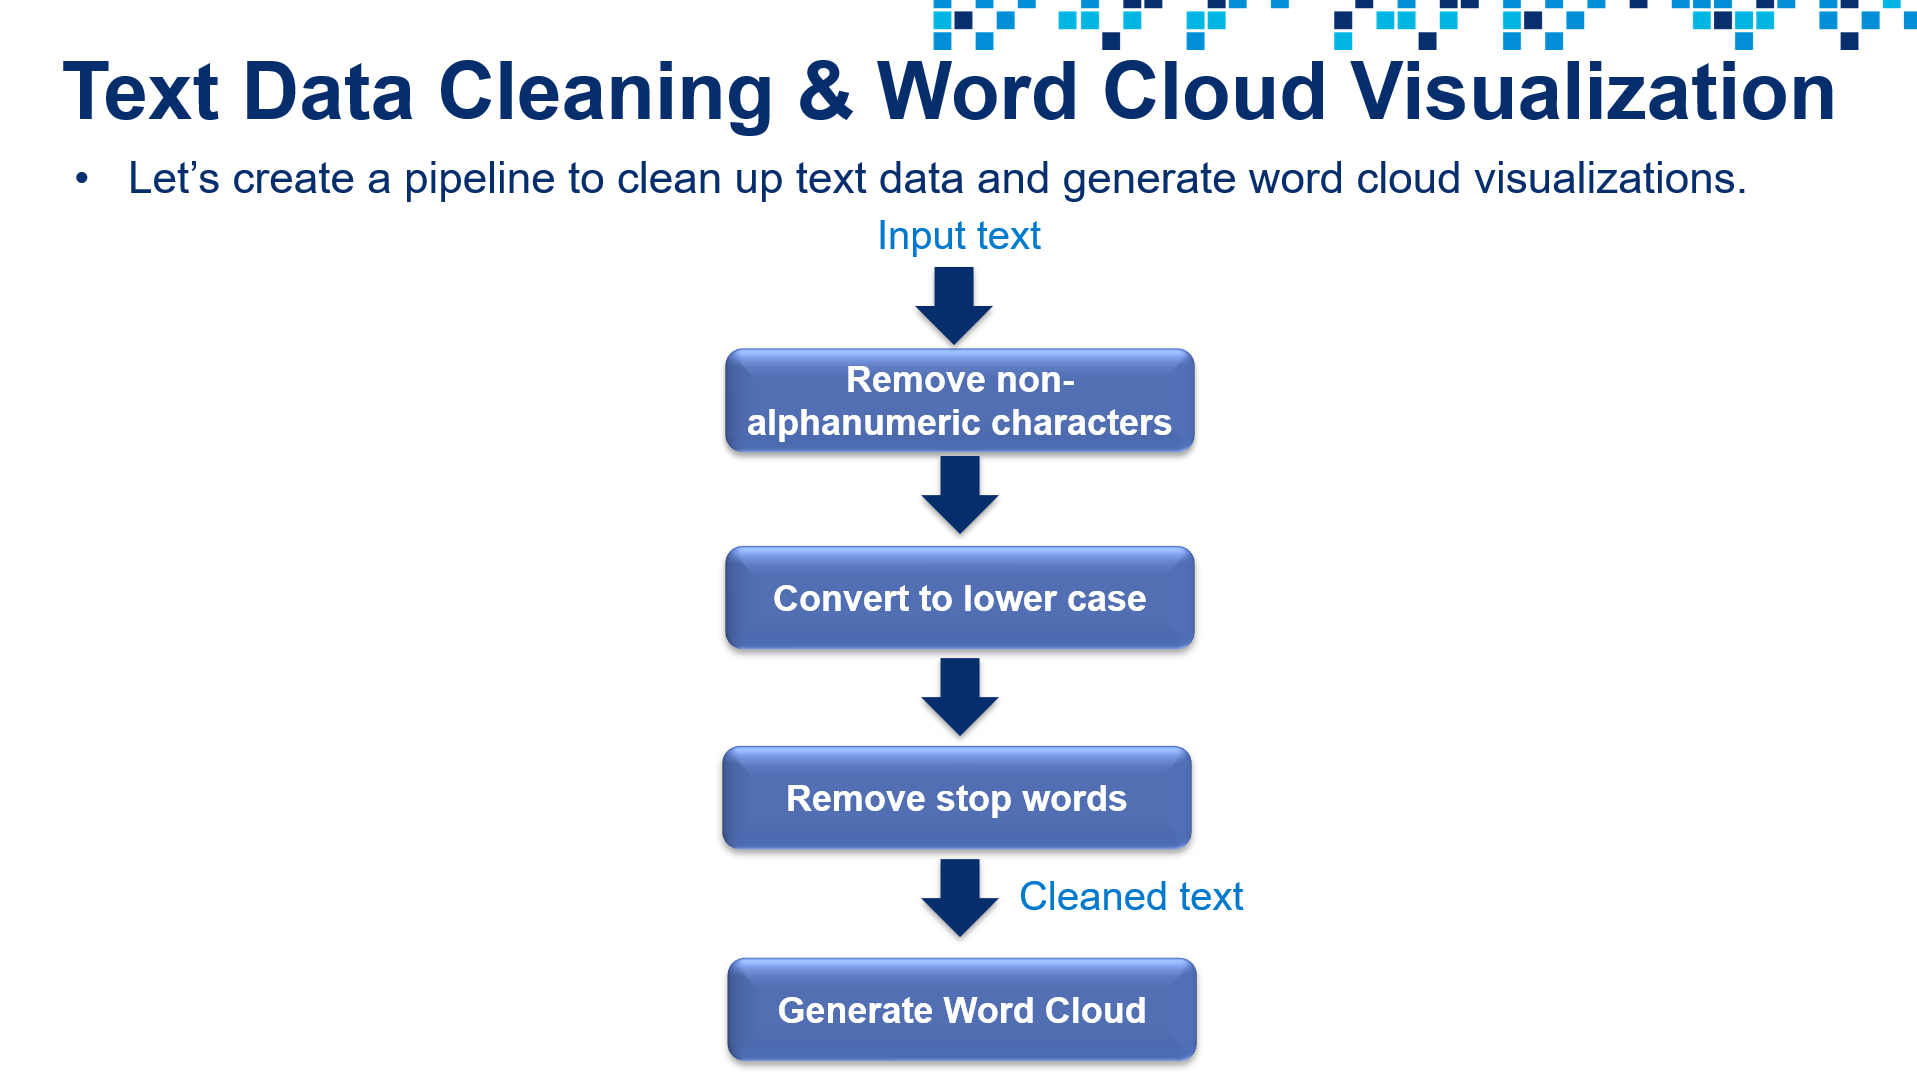

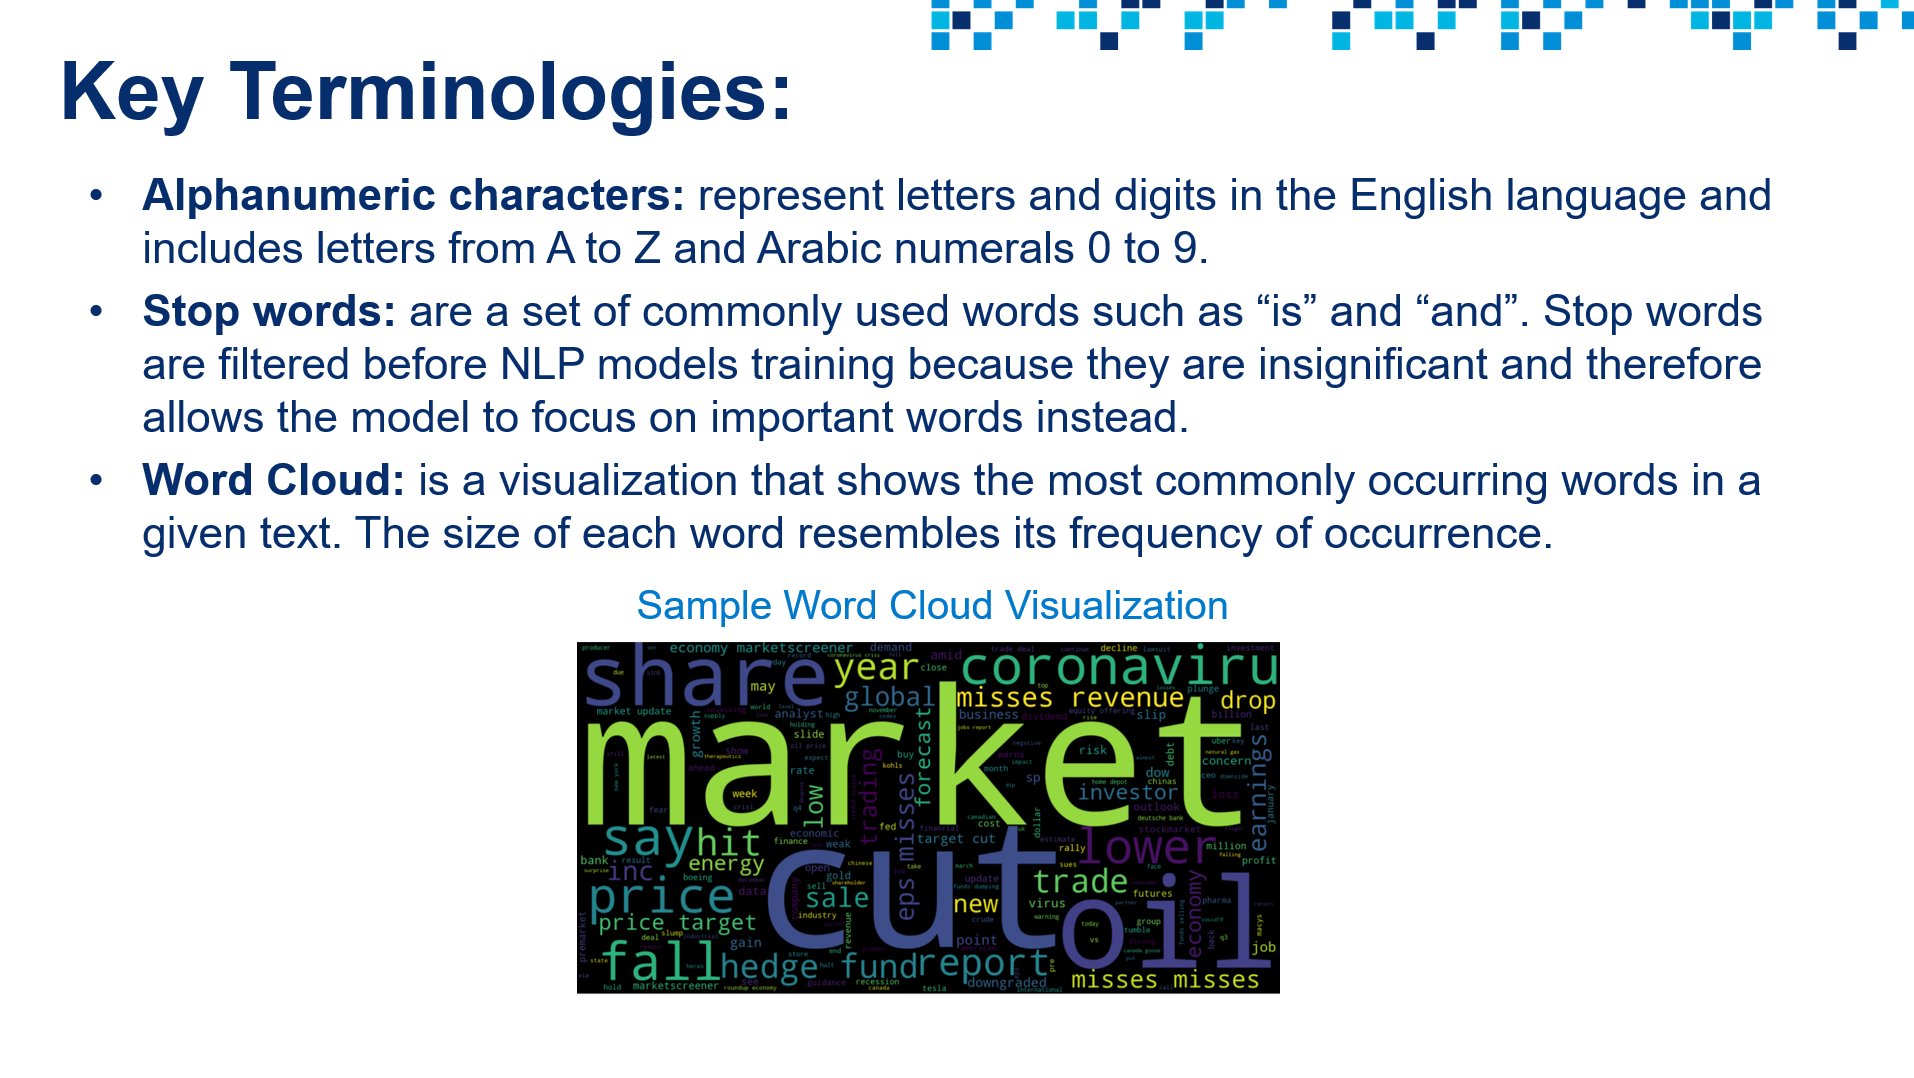

In [ ]:
# Let's import the regular expressions (re) module in Python 
# A regular expression is a sequence of characters that specifies a match pattern in text
# Regular expressions are commonly used for search operations on Strings
import re

In [ ]:
# Let's download common stop words present in the English language from the nltk library
# Stop words are a set of commonly used words such as “is” and “and”
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))

In [ ]:
# Let's define a function that performs data cleaning by removing stop words and non-alphanumeric characters  
# Note that alphanumeric characters (letters and digits) in English includes letters from A to Z and Arabic numerals 0 to 9

# The function takes in a string of text, removes non-alphanumeric characters, converts text to lower case, 
# removes stop words and returns cleaned text in a String format

def clean_text(text):

    # Let's remove non-alphanumeric charachters 
    # The re.sub() returns a string where all matching occurrences of the given pattern are replaced by the provided string
    # This is a regular expression to remove any non-alphanumeric from a string variable called text
    # a-zA-Z0-9 means alphanumeric characters (letters and digits) 
    # a-z and A-Z specify all letters and 0-9 specifies all digits
    # ^ means negated character set
    # Note that "r" creates a raw string that do not process escape sequences (\n)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert text to lower case
    text = text.lower()

    # Remove stop words 
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [ ]:
# Let's test out the Python Function 
clean_text('WELCOME to this practical skills module!!')

In [ ]:
# Let's apply the Python Function to the entire Pandas DataFrame
df['Cleaned Text'] = df['Text'].apply(clean_text)

In [ ]:
# Let's display the Pandas DataFrame
df

In [ ]:
# Let's define a function that receives a string of text and generates word cloud visualization 
# The Python Function also removes custom stop words such as politics-related words before generating the word cloud

# Let's install and import WordCloud library
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def generate_word_cloud(text):
    
    # Add custom stop words
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}

    # Update the default stop words included in the WordCloud library with our custom stop words
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    # Generate the WordCloud object
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)

    # Display the WordCloud 
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
# Generate word cloud visualization for text with negative sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'negative']['Cleaned Text']))

In [ ]:
# Generate word cloud visualization for text with neutral sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'neutral']['Cleaned Text']))

**PRACTICE OPPORTUNITY:**
- **Generate a word cloud visualization for text containing positive sentiment**

# TEXT ENCODING/TOKENIZATION

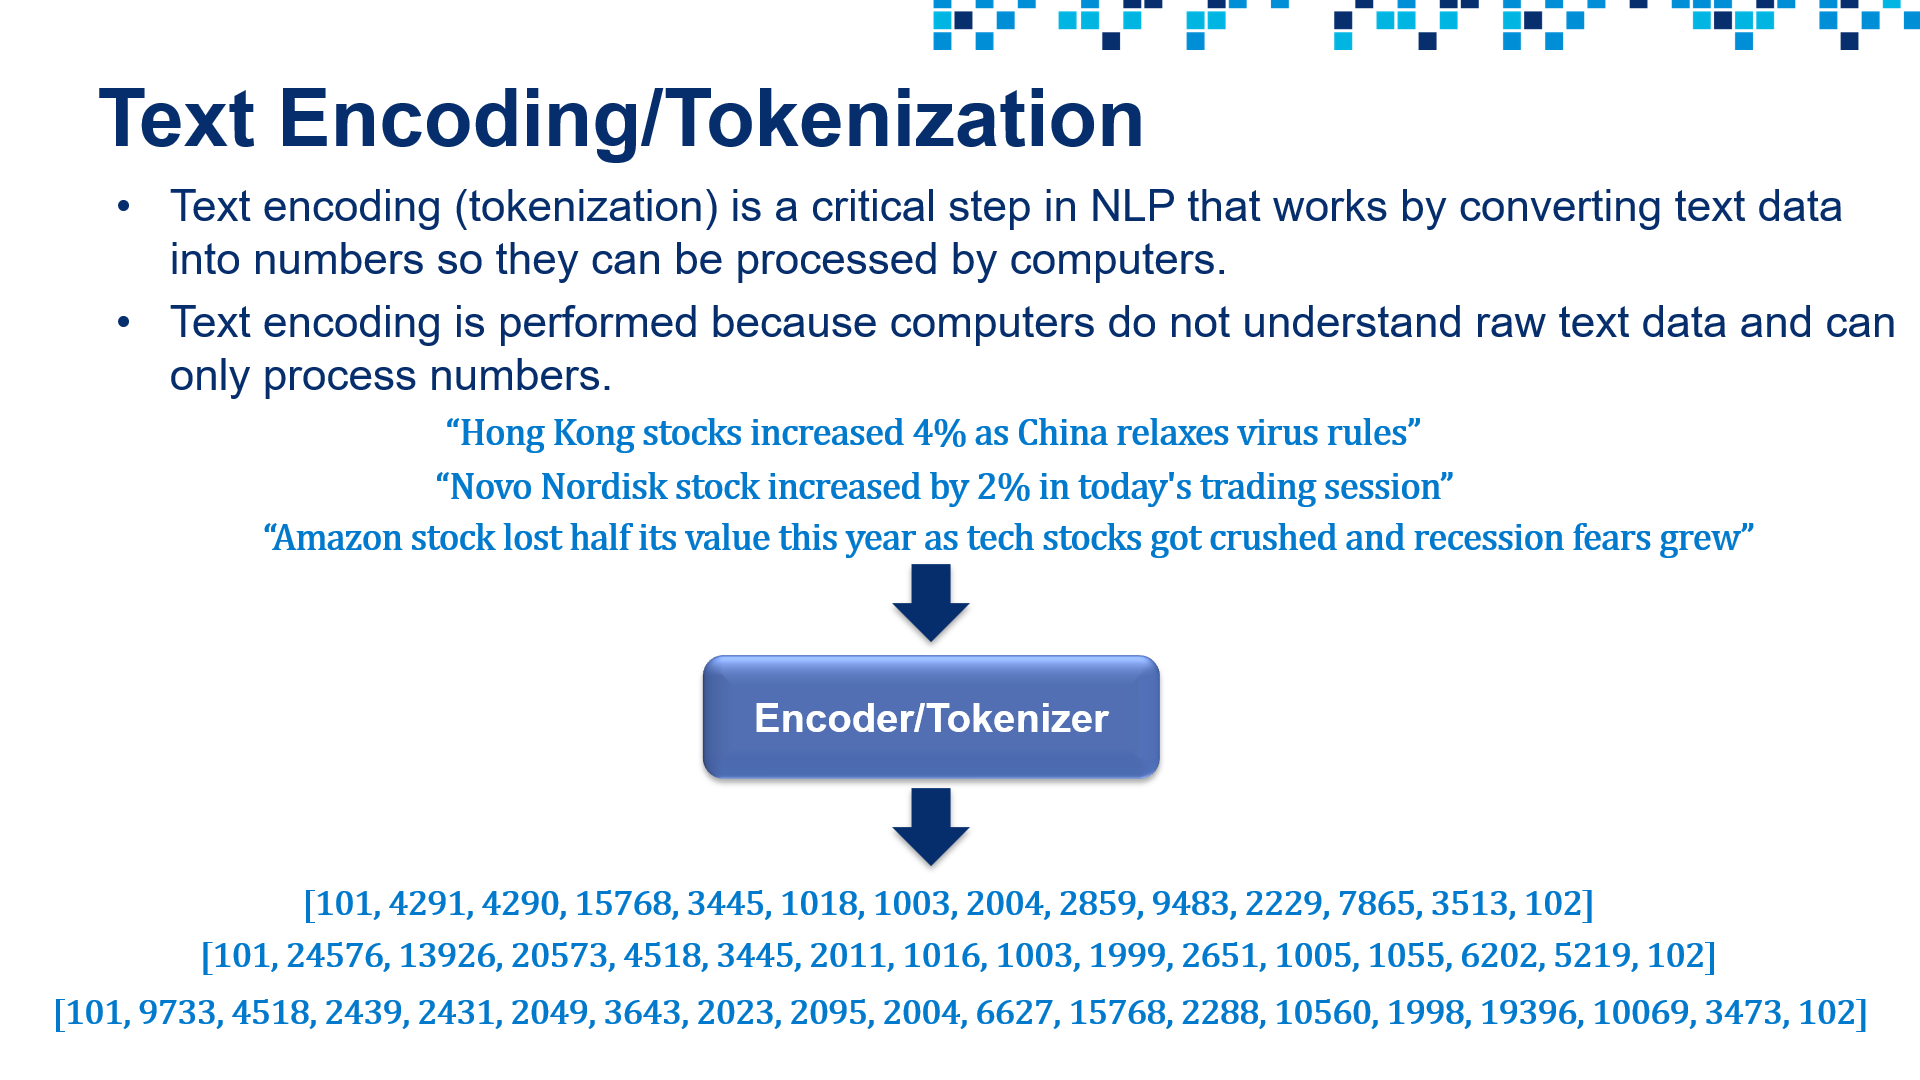

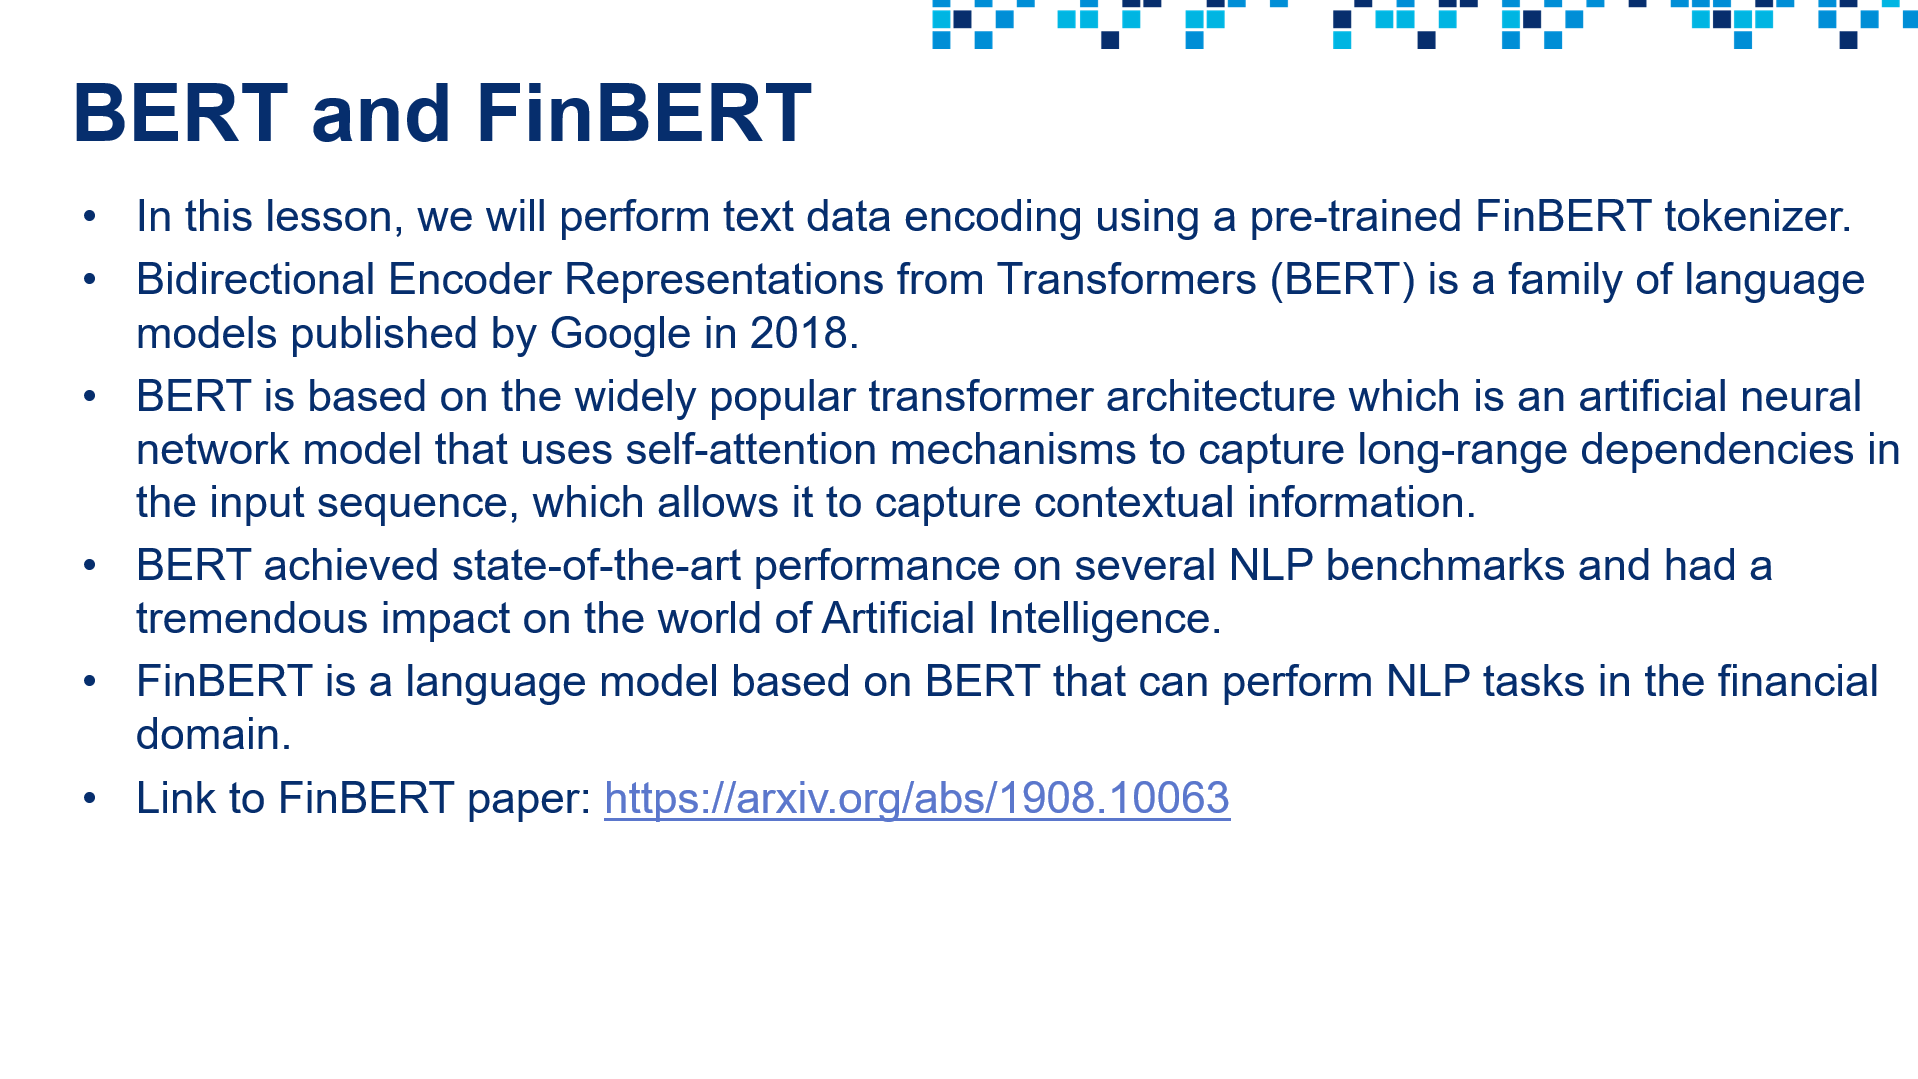

- Link to FinBERT paper: https://arxiv.org/abs/1908.10063

In [ ]:
# Let's perform text data encoding by converting text into numbers to be used for model training
# FinBERT is a pre-trained NLP model to analyze sentiment of financial text
# Hugging Face is a popular community and data science platform that offers tools to build, train and deploy AI/ML models
# Prosus is a global consumer internet group and one of the largest technology investors in the world
# Source: https://huggingface.co/ProsusAI/finbert

!pip install transformers

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

In [ ]:
news_1 = "Hong Kong stocks increased 4% as China relaxes virus rules"
news_2 = "Novo Nordisk stock increased by 2% in today's trading session"
news_3 = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"

In [ ]:
# View an encoded version of a sample dataset #1
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)

In [ ]:
# View an encoded version of a sample dataset #2
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)

In [ ]:
# View an encoded version of a sample dataset #3
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)

**PRACTICE OPPORTUNITY:**
- **Encode/Tokenize the following two statements:**
    - **"JPMorgan Sees 70% Upside for These 2 Auto Stocks in 2023"**
    - **"JPMorgan, Goldman Say Stocks Recovery Won’t Be Easy in 2023"**

# TEXT DATA PADDING

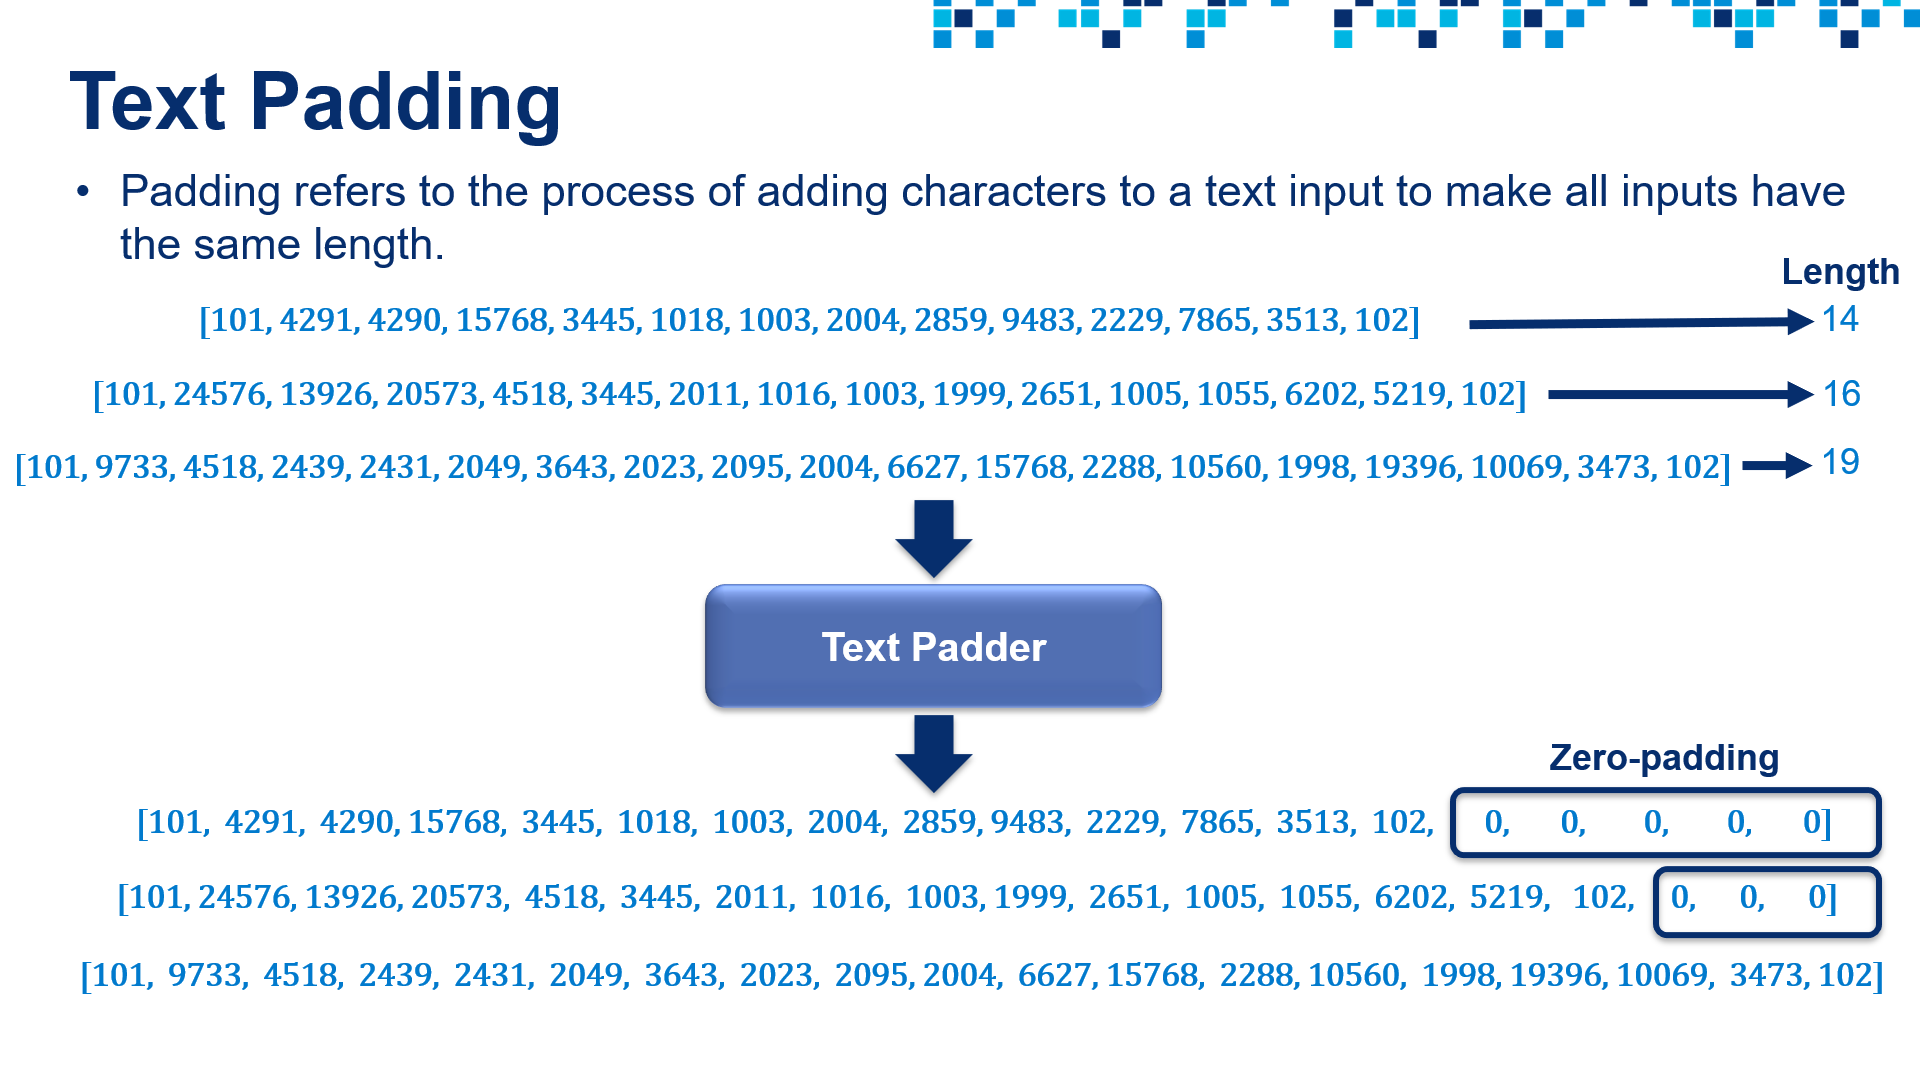

In [ ]:
# View an encoded version of sample dataset #1 and obtain its length 
print(encoded_news_1)
len(encoded_news_1)

In [ ]:
# View an encoded version of sample dataset #2 and obtain its length
print(encoded_news_2)
len(encoded_news_2)

In [ ]:
# View an encoded version of sample dataset #3 and obtain its length
print(encoded_news_3)
len(encoded_news_3)

In [ ]:
# Data has to be converted to tensors so we can perform padding 
# PyTorch is a widely used framework developed my META that offers an easy-to-use interface for building, training and testing ANNs 
# Tensors are the main data structure used in PyTorch to represent multi-dimensional arrays, such as images, text, or audio 
# Tensors can be created from Numpy arrays or from Python Lists

# Let's install PyTorch
!pip install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


In [ ]:
# Let's import torch and perform sequence padding
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), torch.tensor(encoded_news_3)], batch_first = True, padding_value = 0).numpy()
padded_sequence

**PRACTICE OPPORTUNITY:**
- **Perform tokenization and padding to the following text data:**
    - **"Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"**
    - **"Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just \\$231 million. That shareholding has since soared almost 50,000% in value to today’s \$114 billion"**
    - **"Amazon lost half its value this year as tech stocks got crushed and recession fears grew"**

# DEVELOP A PIPELINE FOR TEXT DATA ENCODING/TOKENIZATION AND PADDING

In [ ]:
# Let's define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [ ]:
# Call the function and send it the entire Pandas DataFrame "df"
# The function returns X which is going to be used as an input to the machine learning model
X = tokenization_padding(df)
X

In [ ]:
# Let's check out the shape of X
X.shape

In [ ]:
# Let's view the Pandas DataFrame df
df

In [ ]:
# Let's encode the label (target) column as follows:  
    # positive = 0
    # negative = 1
    # neutral  = 2
df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)

In [ ]:
# Let's view the new Pandas DataFrame
df

In [ ]:
# The encoded label will be the output from the model "y"
y = df['Encoded Label'] 
y

# SPLIT THE DATA INTO TRAINING, VALIDATION AND TESTING SUBSETS

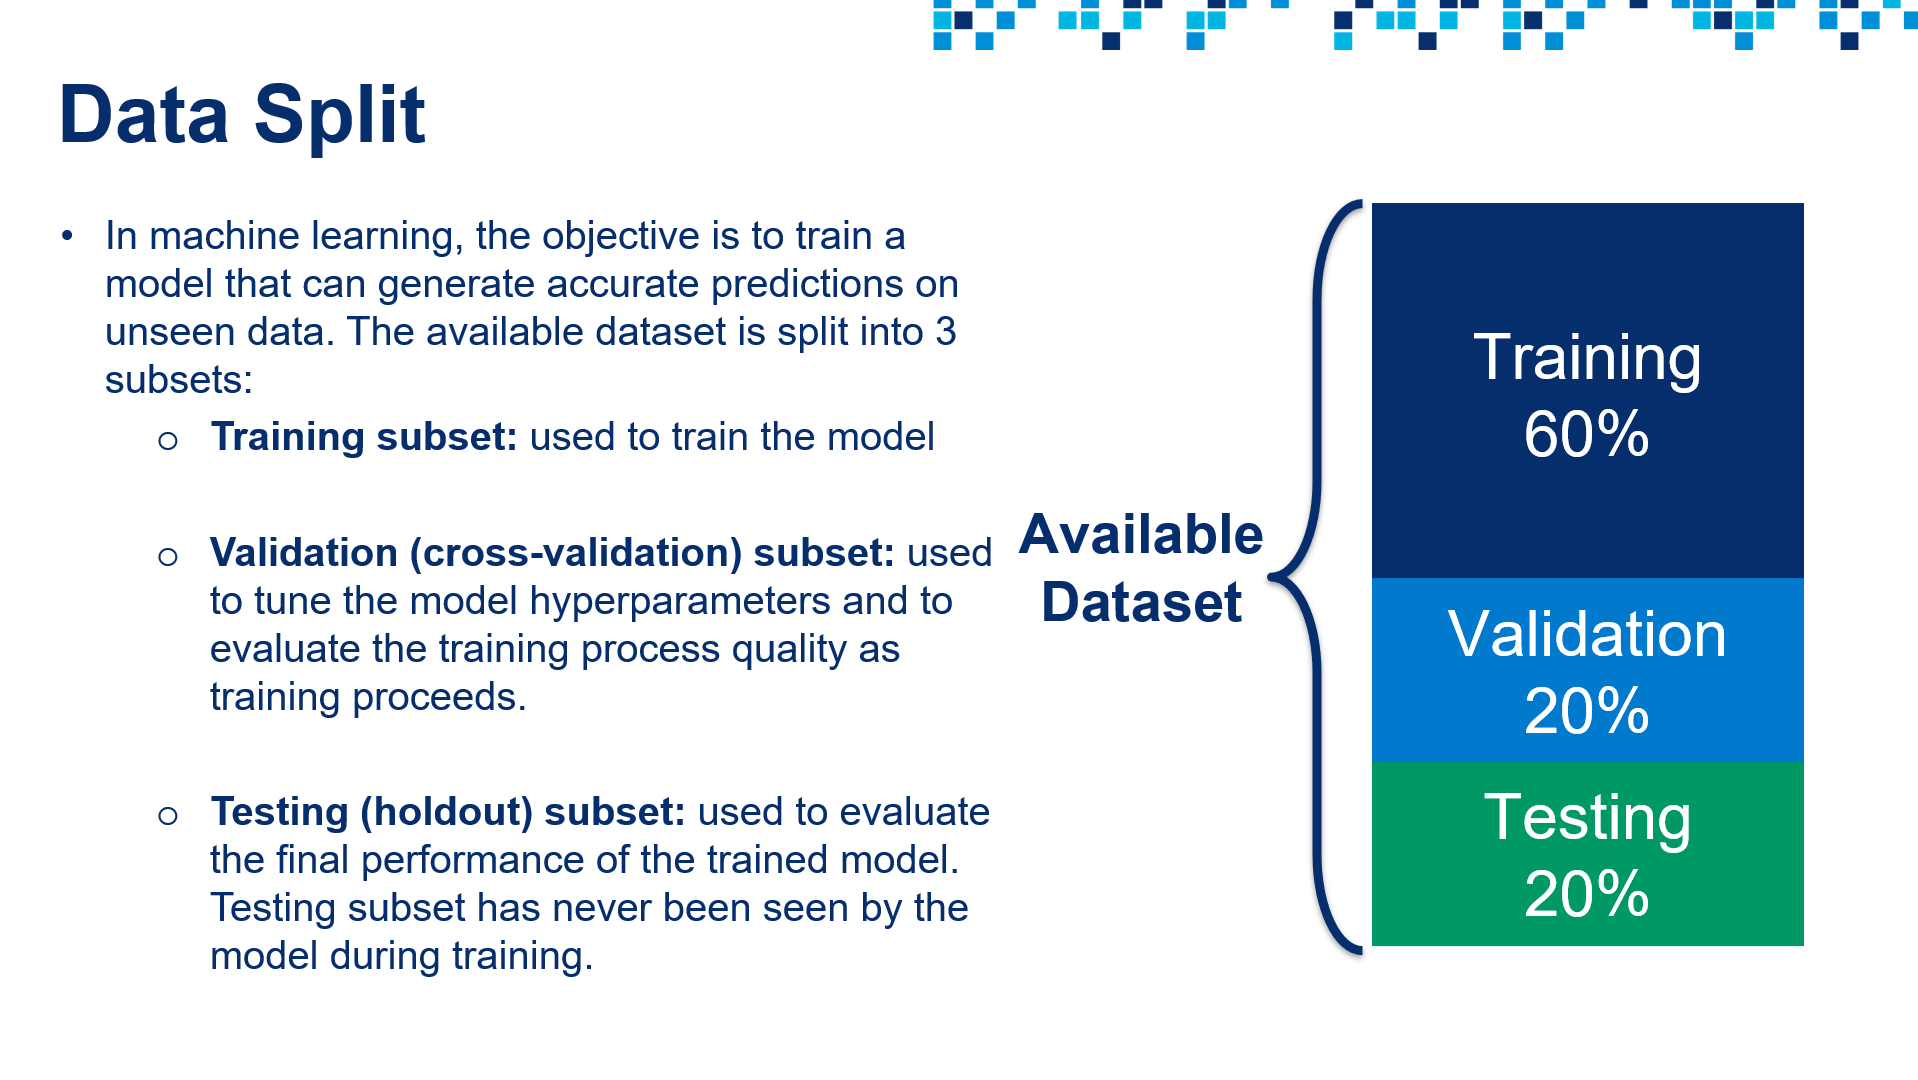

In [ ]:
# Let's use Scikit-Learn to split the data into training, validation and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [ ]:
# Let's check out the shape of the training, validation and testing subsets 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

**PRACTICE OPPORTUNITY:** 
- **Using Scikit-Learn library, split the data into 15% for testing, 15% for validation and 70% for training while enabling shuffling.** 
- **How many samples are present in the training, validation and testing subsets?**

# UNDERSTAND THE INTUITION BEHIND LONG SHORT-TERM MEMORY (LSTM) NEURAL NETWORK

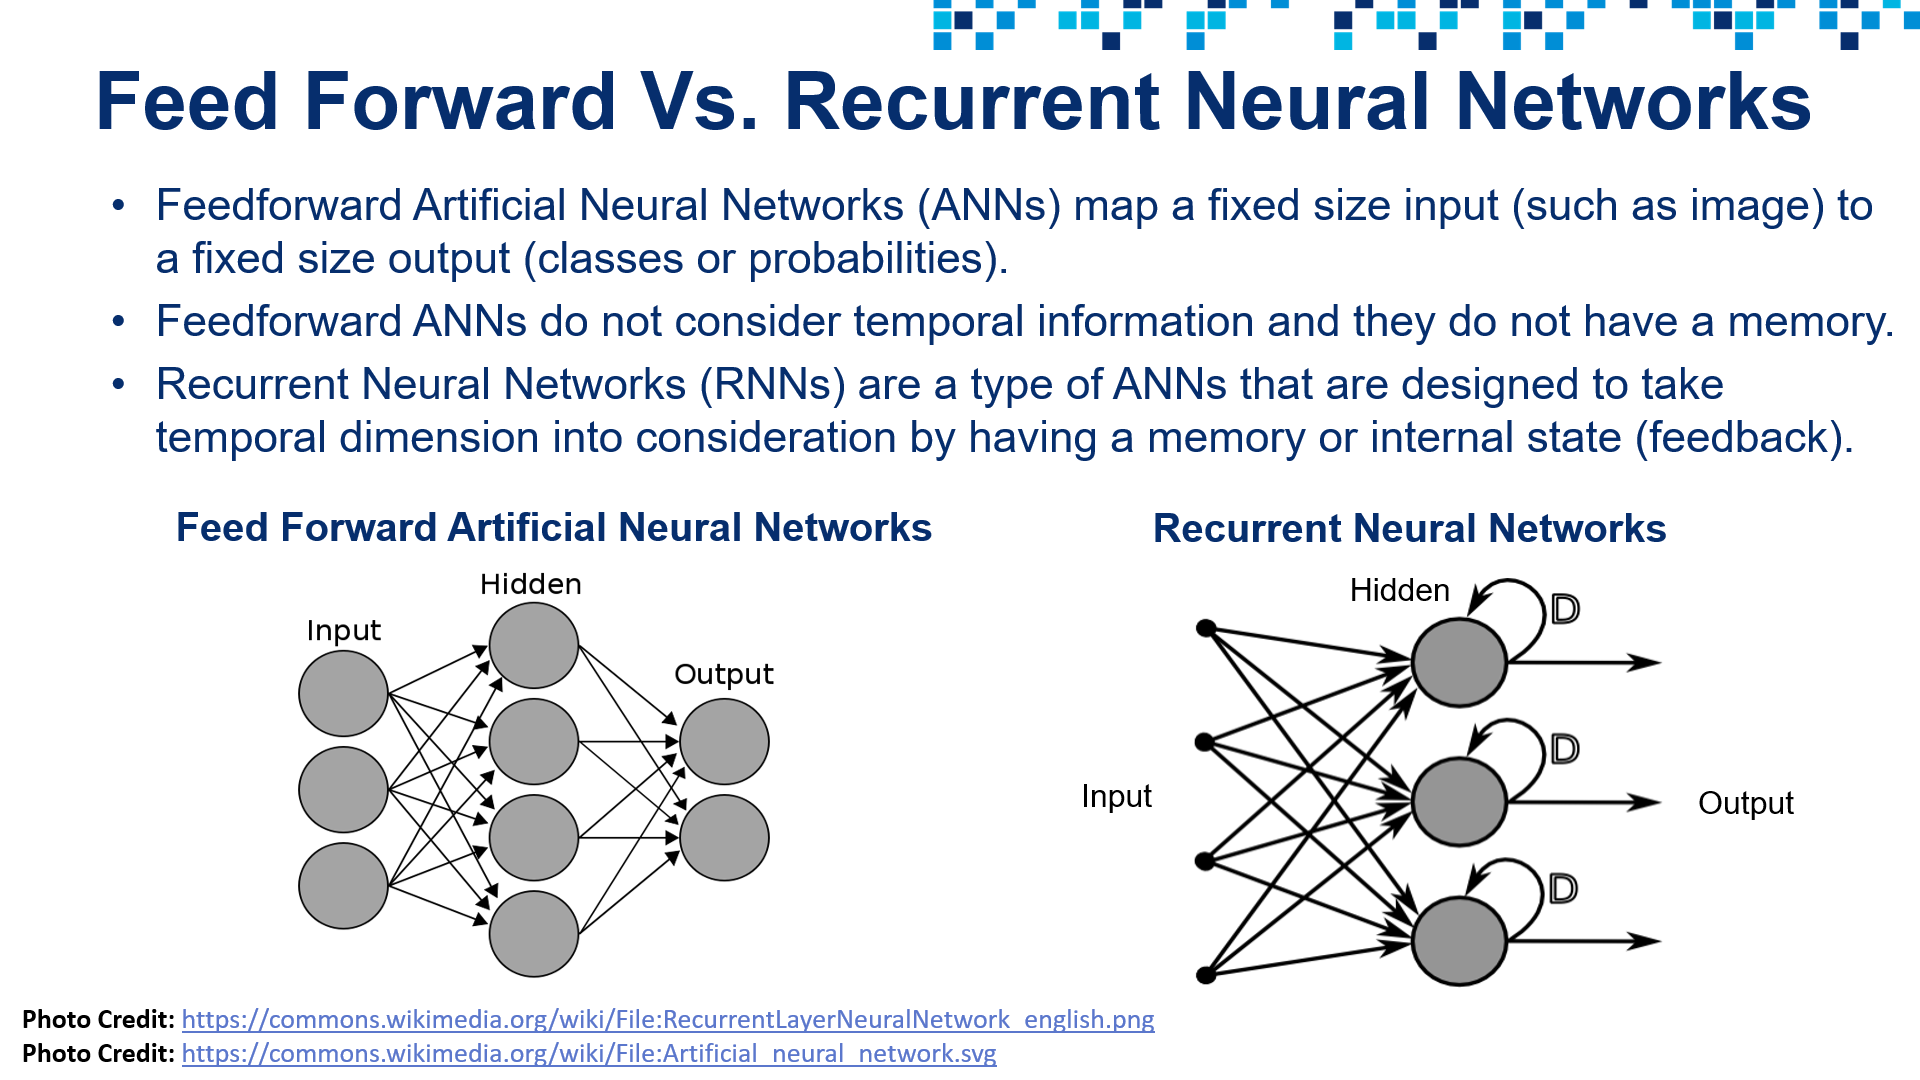

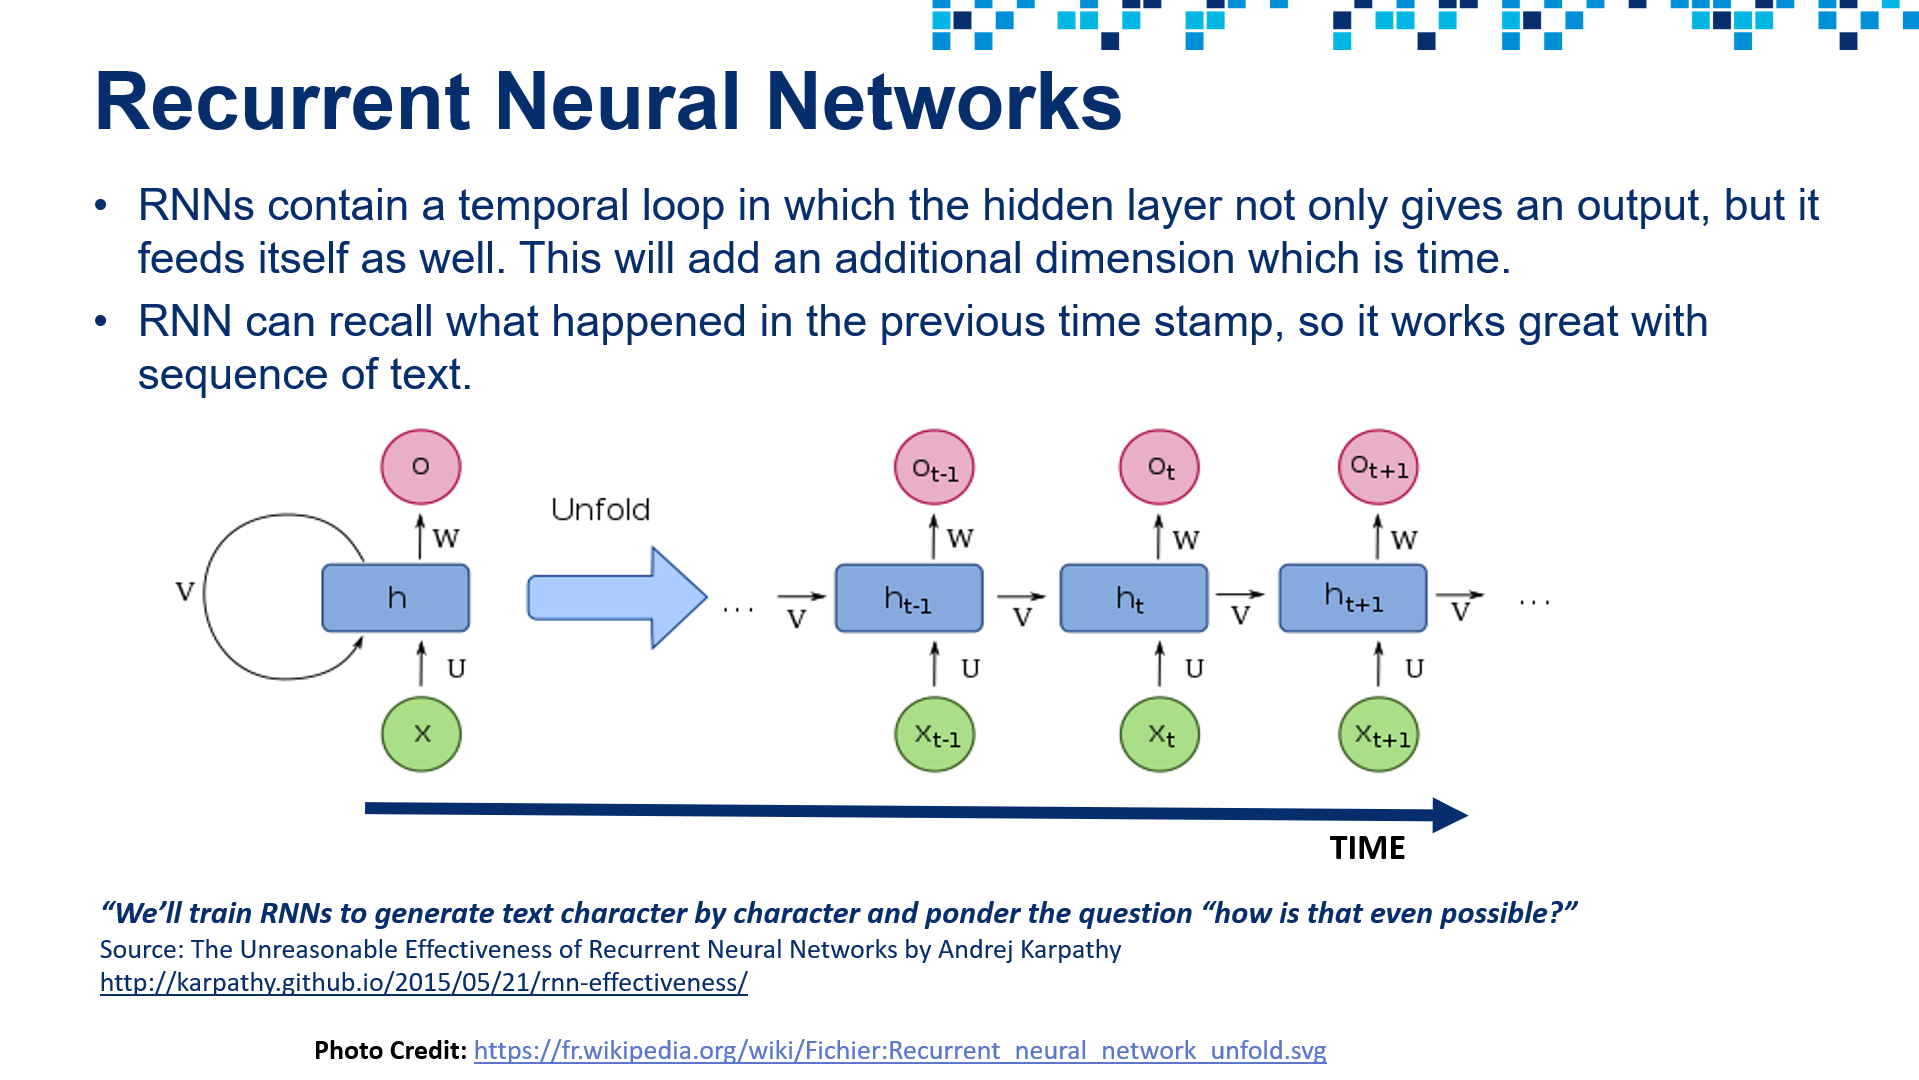

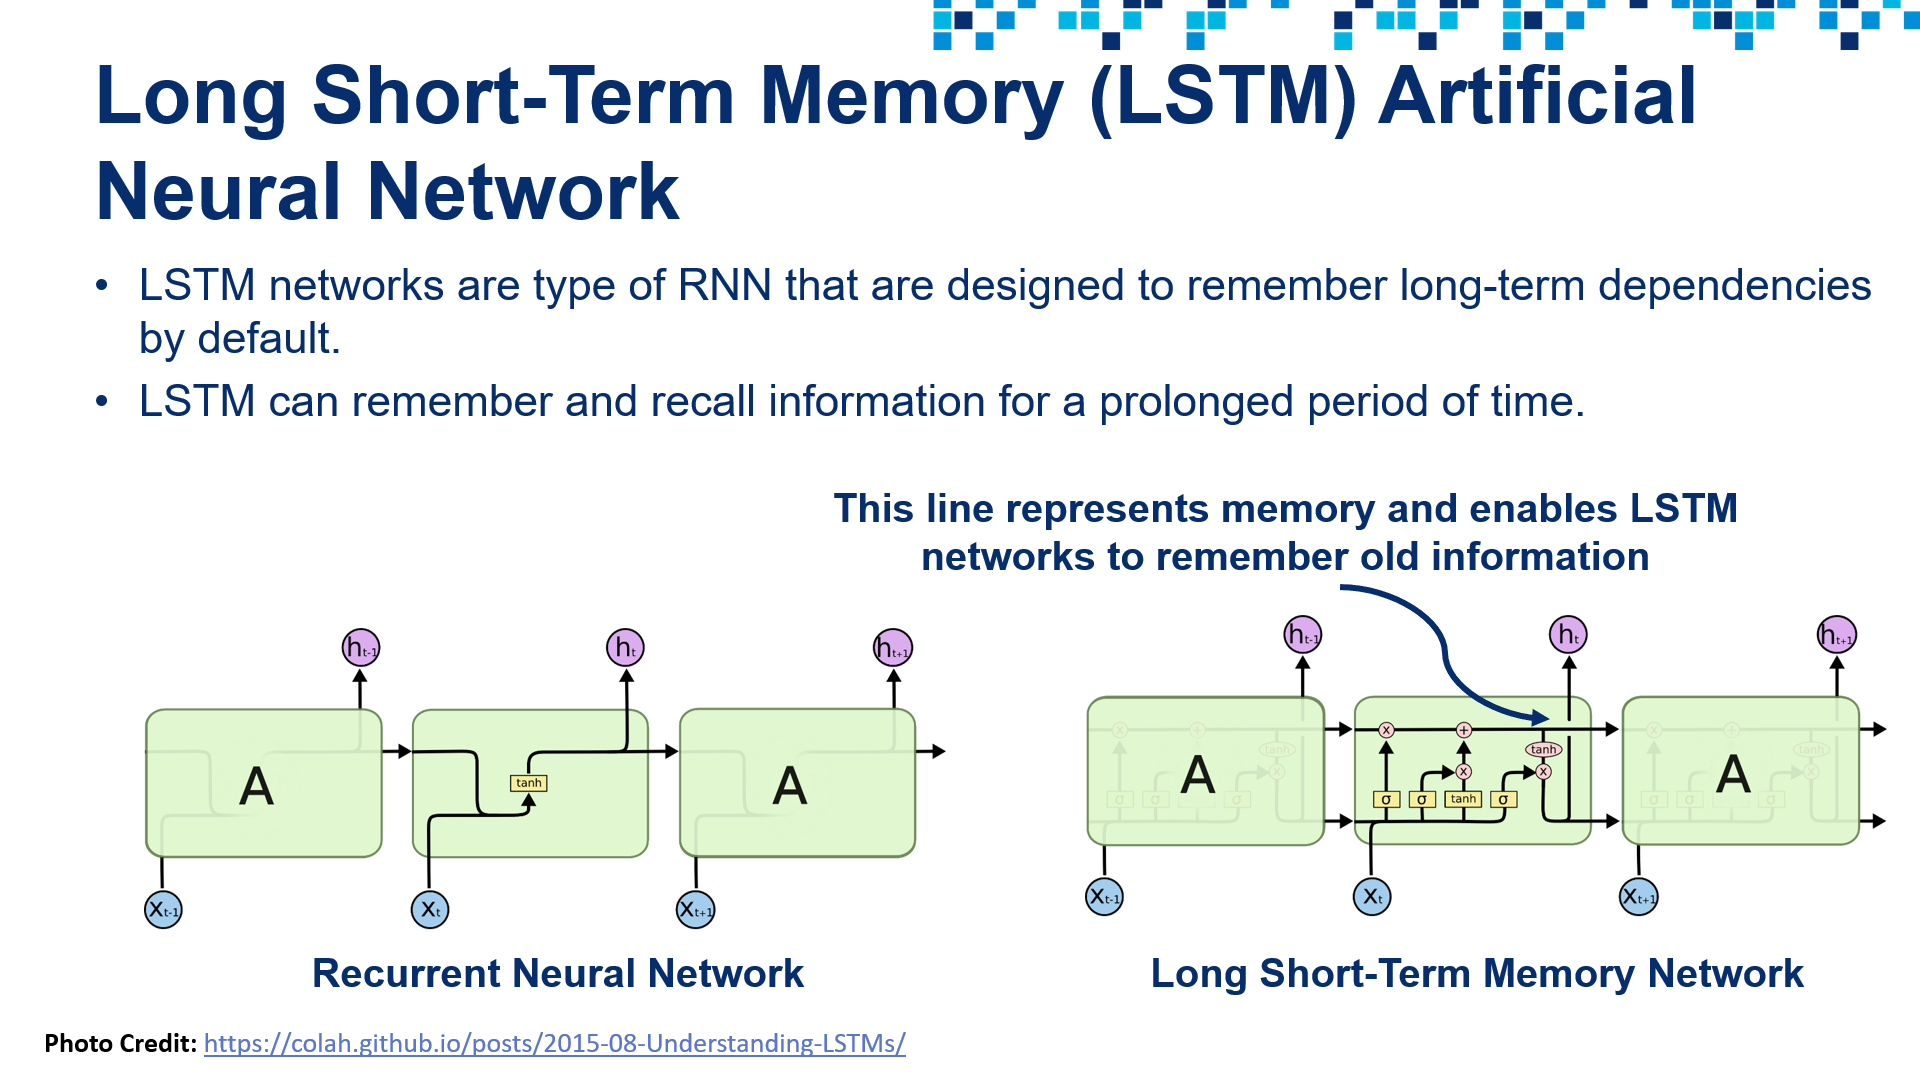

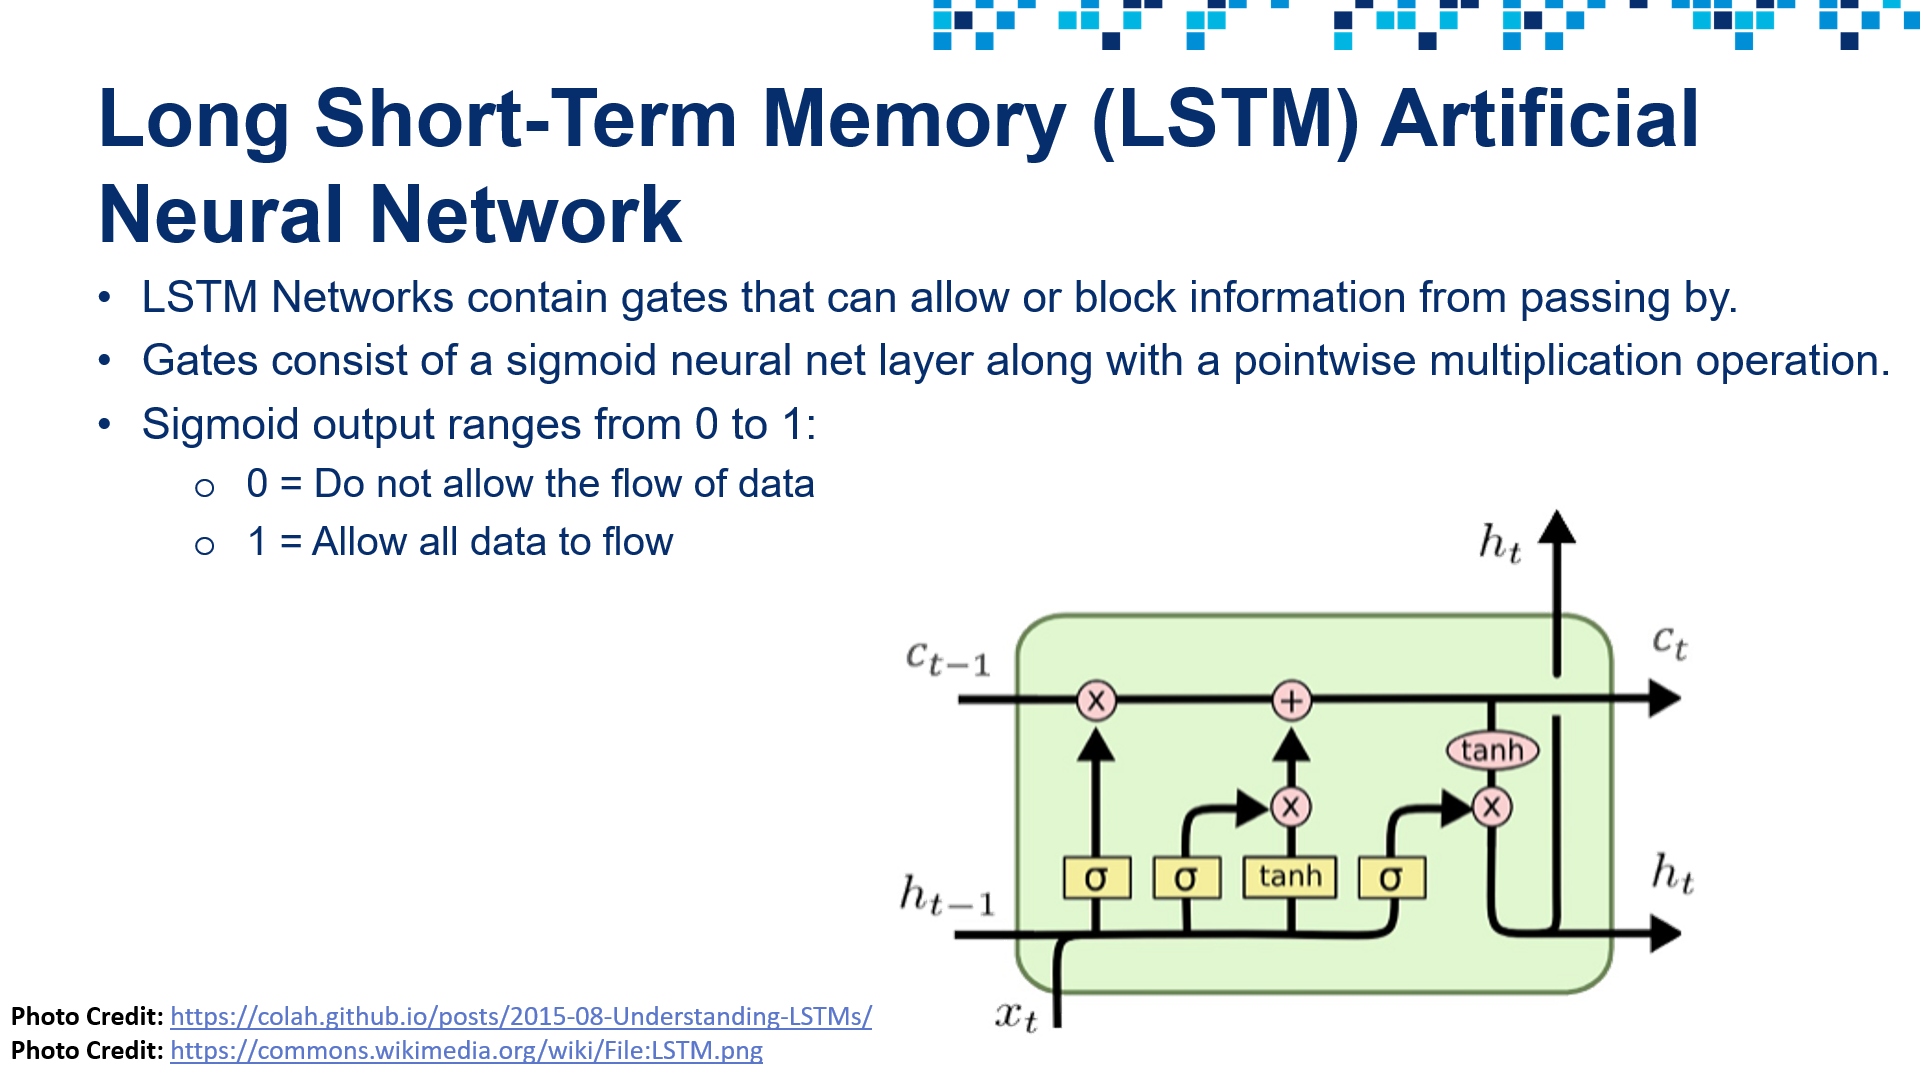

# TRAIN A LONG SHORT-TERM MEMORY (LSTM) NEURAL NETWORK

In [ ]:
# In this lesson, we will build a classic LSTM neural network using Keras and Tensorflow 
# Note that transformer-based ANNs outperform classic LSTMs 
# Transformers use self-attention mechanism to capture long-range dependencies in the input sequence so...
# They can capture contextual information better compared to classic LSTMs 
# We will leverage pre-trained transformer-based BERT models in the next few lessons

# Let's import Tensorflow 
# Tensorflow is an open-source library developed by Google 
# Tensorflow is used for artificial intelligence models training and deployment

# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
!pip install tensorflow-cpu
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Build an LSTM Neural Network using Keras
# LSTM is a type of recurrent neural network that works by capturing long-term dependencies in the input sequence 

# Embedding represents words or symbols as fixed-length vectors of real numbers. 
# This is performed to convert discrete inputs (ex: words) into continuous-valued inputs to be processed by LSTM network
# The embedding layer takes a sequence of input symbols and maps them to a dense vector space
# It is initialized with random values and trained jointly with the rest of the LSTM model

# The number of units in the LSTM layer determines the number of memory cells in the network 
# which determines how much of the past information can be retained and used to make predictions
# We chose an LSTM with 64 units because it offers a good balance between model complexity and performance
# After the LSTM layer, we will flatten the output to get a one-dimensional vector 
# Afterwards, we pass the flattened vector through a dense layer with a softmax activation function to obtain the final output

# Activation functions are used in ANNs to introduce non-linearity into the network
# Two activation functions are used: 
    # tanh: It maps the input values to the range of [-1, 1], which can be useful in normalizing the input 
    # tanh is often used in the hidden layers of ANNs

    # softmax: It converts a vector of numbers into a vector of probabilities
    # softmax is used in the output layer of a classification ANNs 

    
# The FinBERT tokenizer is used to pre-process text data before it is fed into the ANN model
# The tokenizer maps each word or subword in the input text to a unique integer ID from the vocabulary
# The input dimension of the ANN is determined by the length of the maximum sequence of words in the input data 
# The output dimension is 768 because the pre-trained FinBERT model used in this project has 768 hidden units in its last layer 
    
inputs = tf.keras.Input(shape = (X_train.shape[1],))


x = tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size,
                              output_dim = 768,
                              input_length = X_train.shape[1])(inputs)

x = tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)


In [ ]:
# Compile the model and choose the optimizer
# Adam optimizer works well in several deep learning applications such as computer vision and natural language processing 

# Cross entropy loss is a commonly used loss function in classification problems
# The goal is to predict a probability distribution over a set of classes
# Cross entropy loss measures the difference between predicted probability distribution and true distribution of the labels 
# "sparse_categorical_crossentropy" loss is used to measure the difference between the predicted sentiment class 
# and the true (ground truth) setiment label class
# The objective is to minimize this loss during training in order to improve the accuracy of model predictions

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Display a summary of the LSTM model
model.summary()

In [ ]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 32,
                    epochs = 3)

**PRACTICE OPPORTUNITY:**
- **Change the architecture of the LSTM network by using 512 units instead of 64**
- **Print the model summary**
- **How many trainable parameters does this new network have?**

# CONFUSION MATRIX AND CLASSIFICATION MODELS KPIs

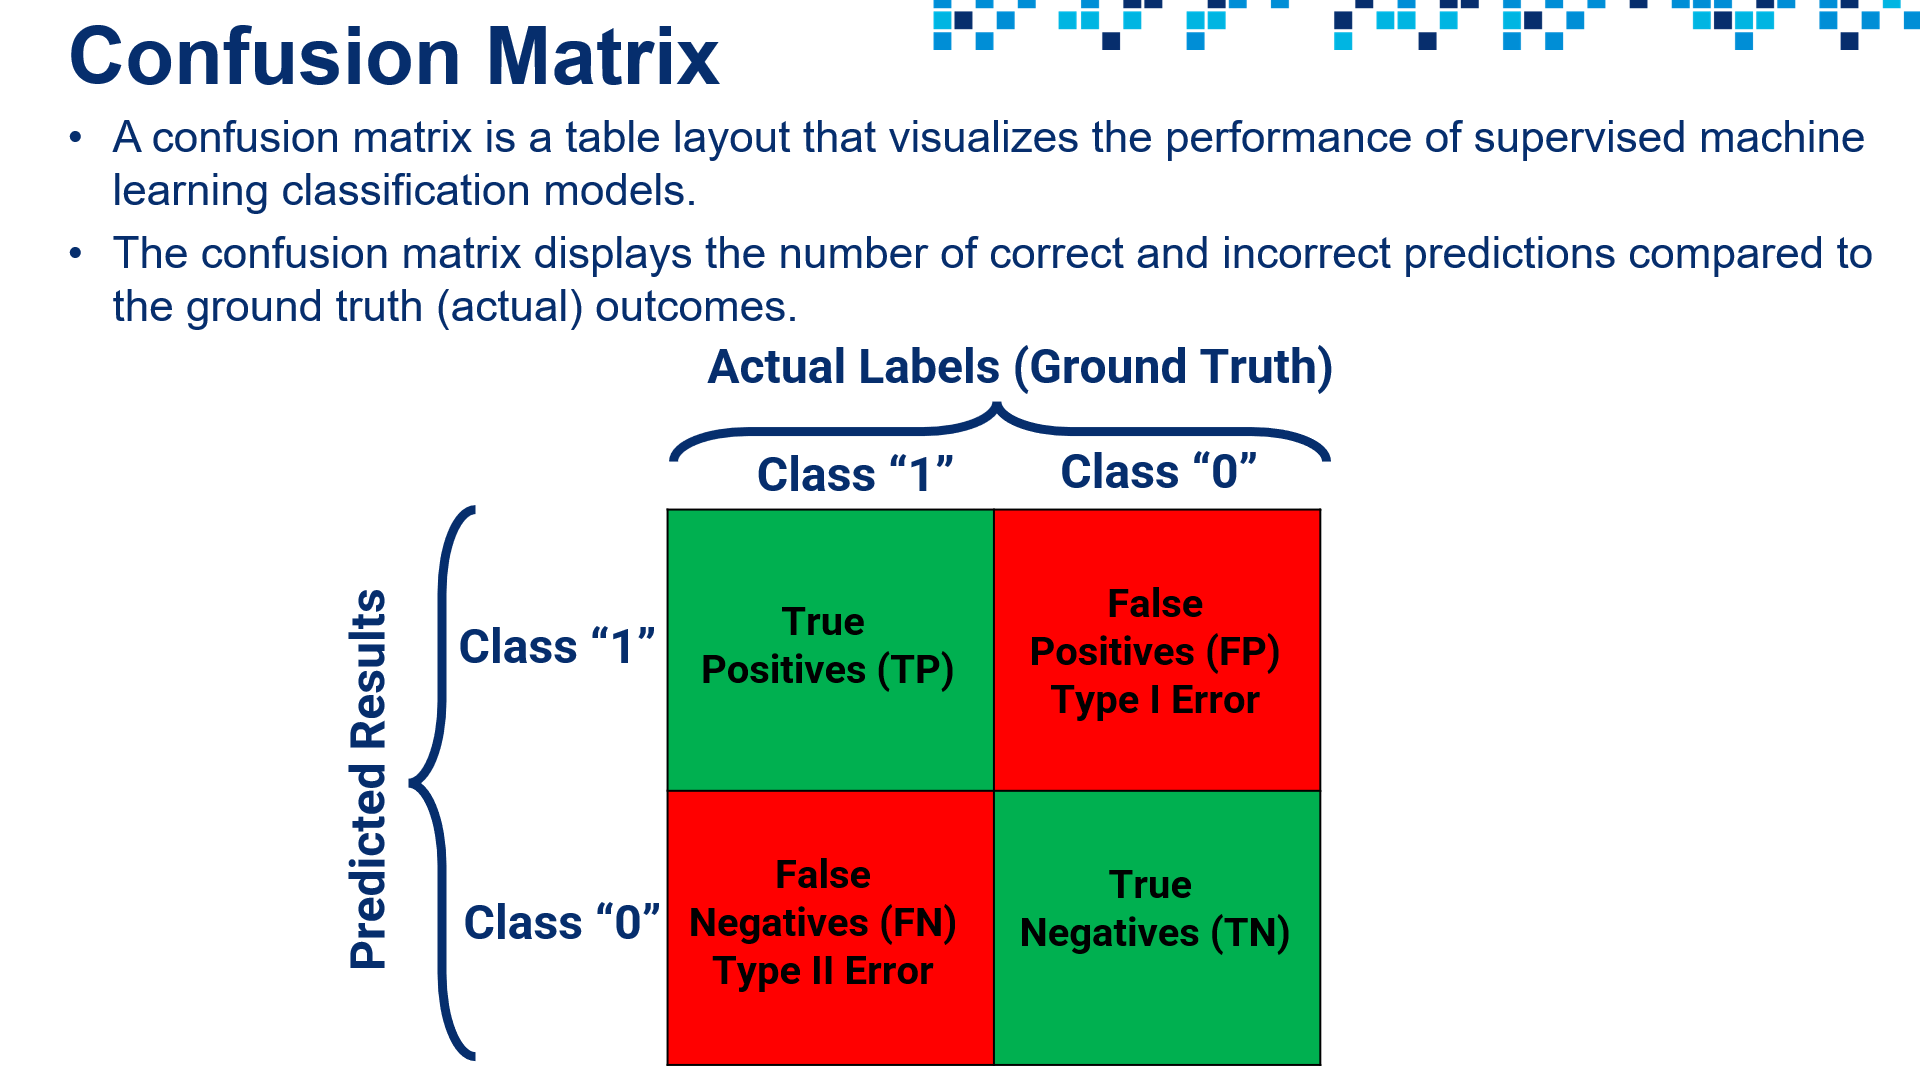

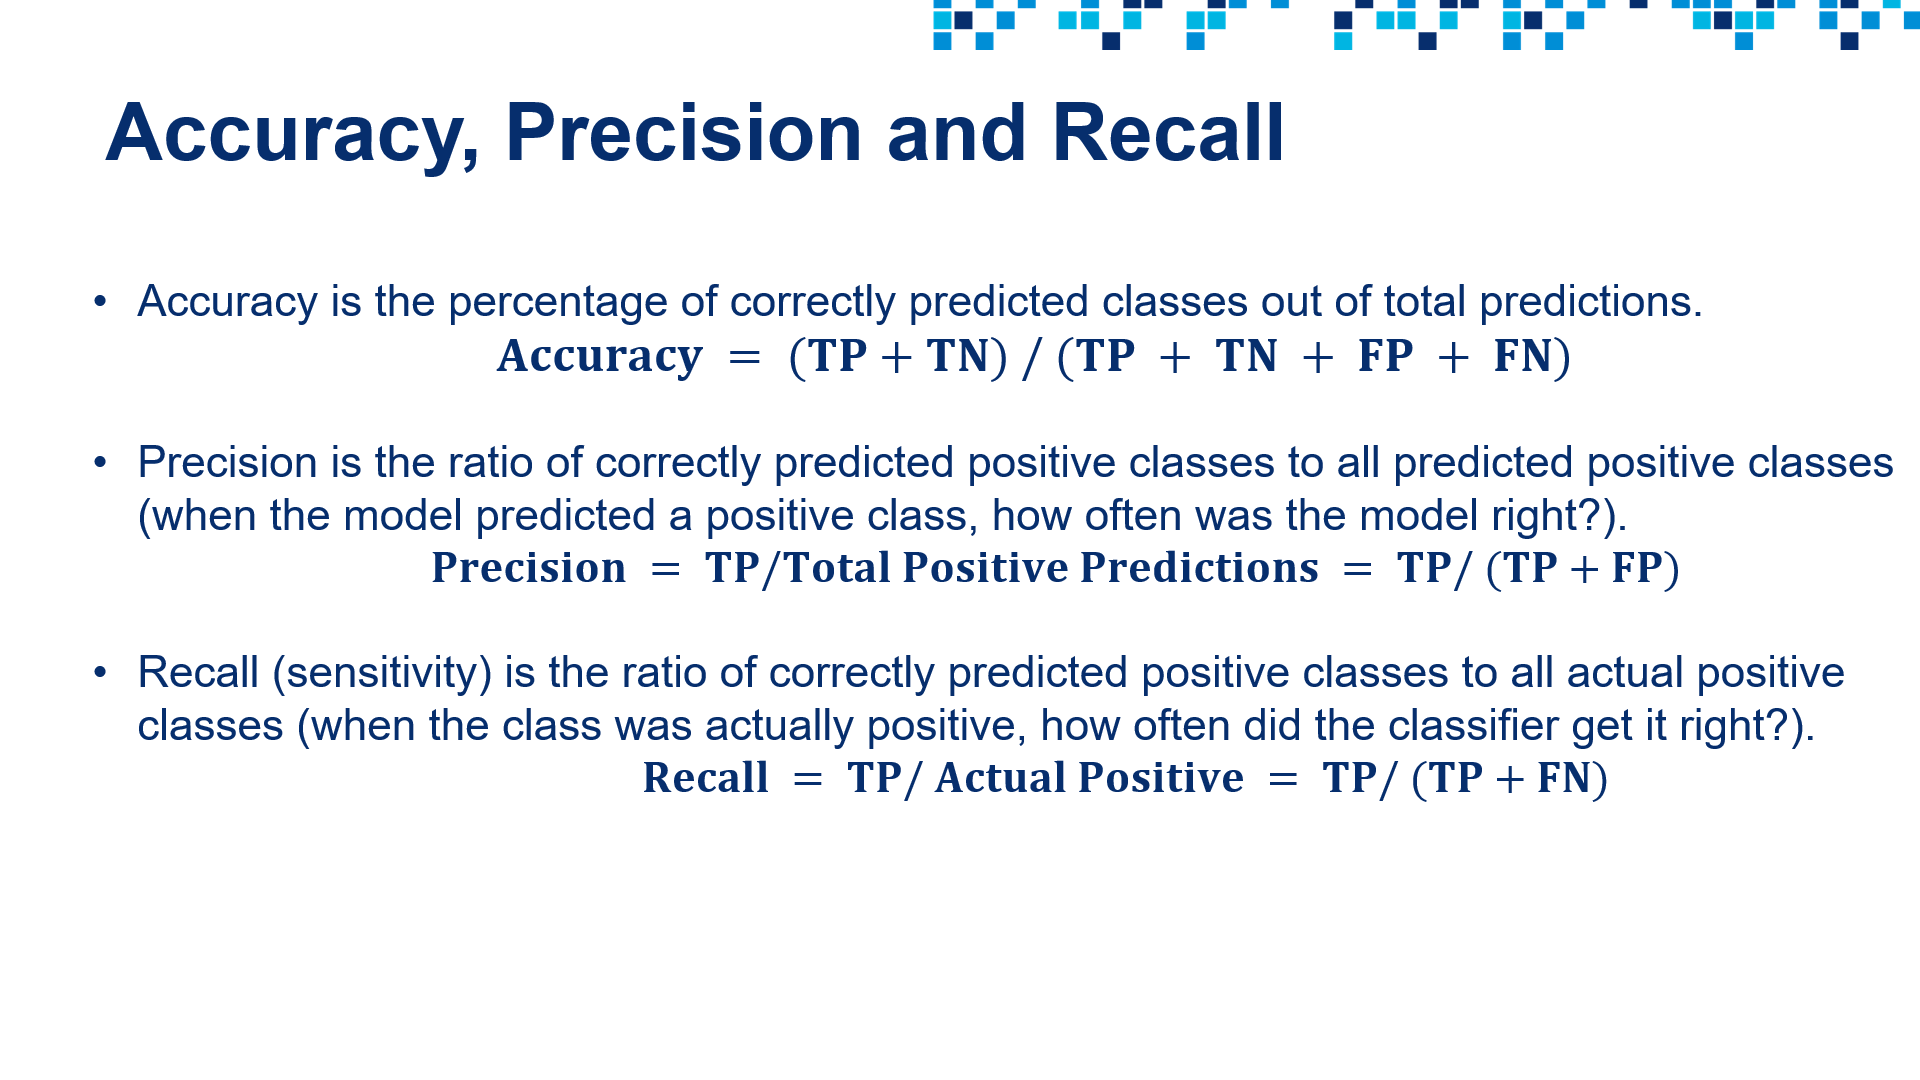

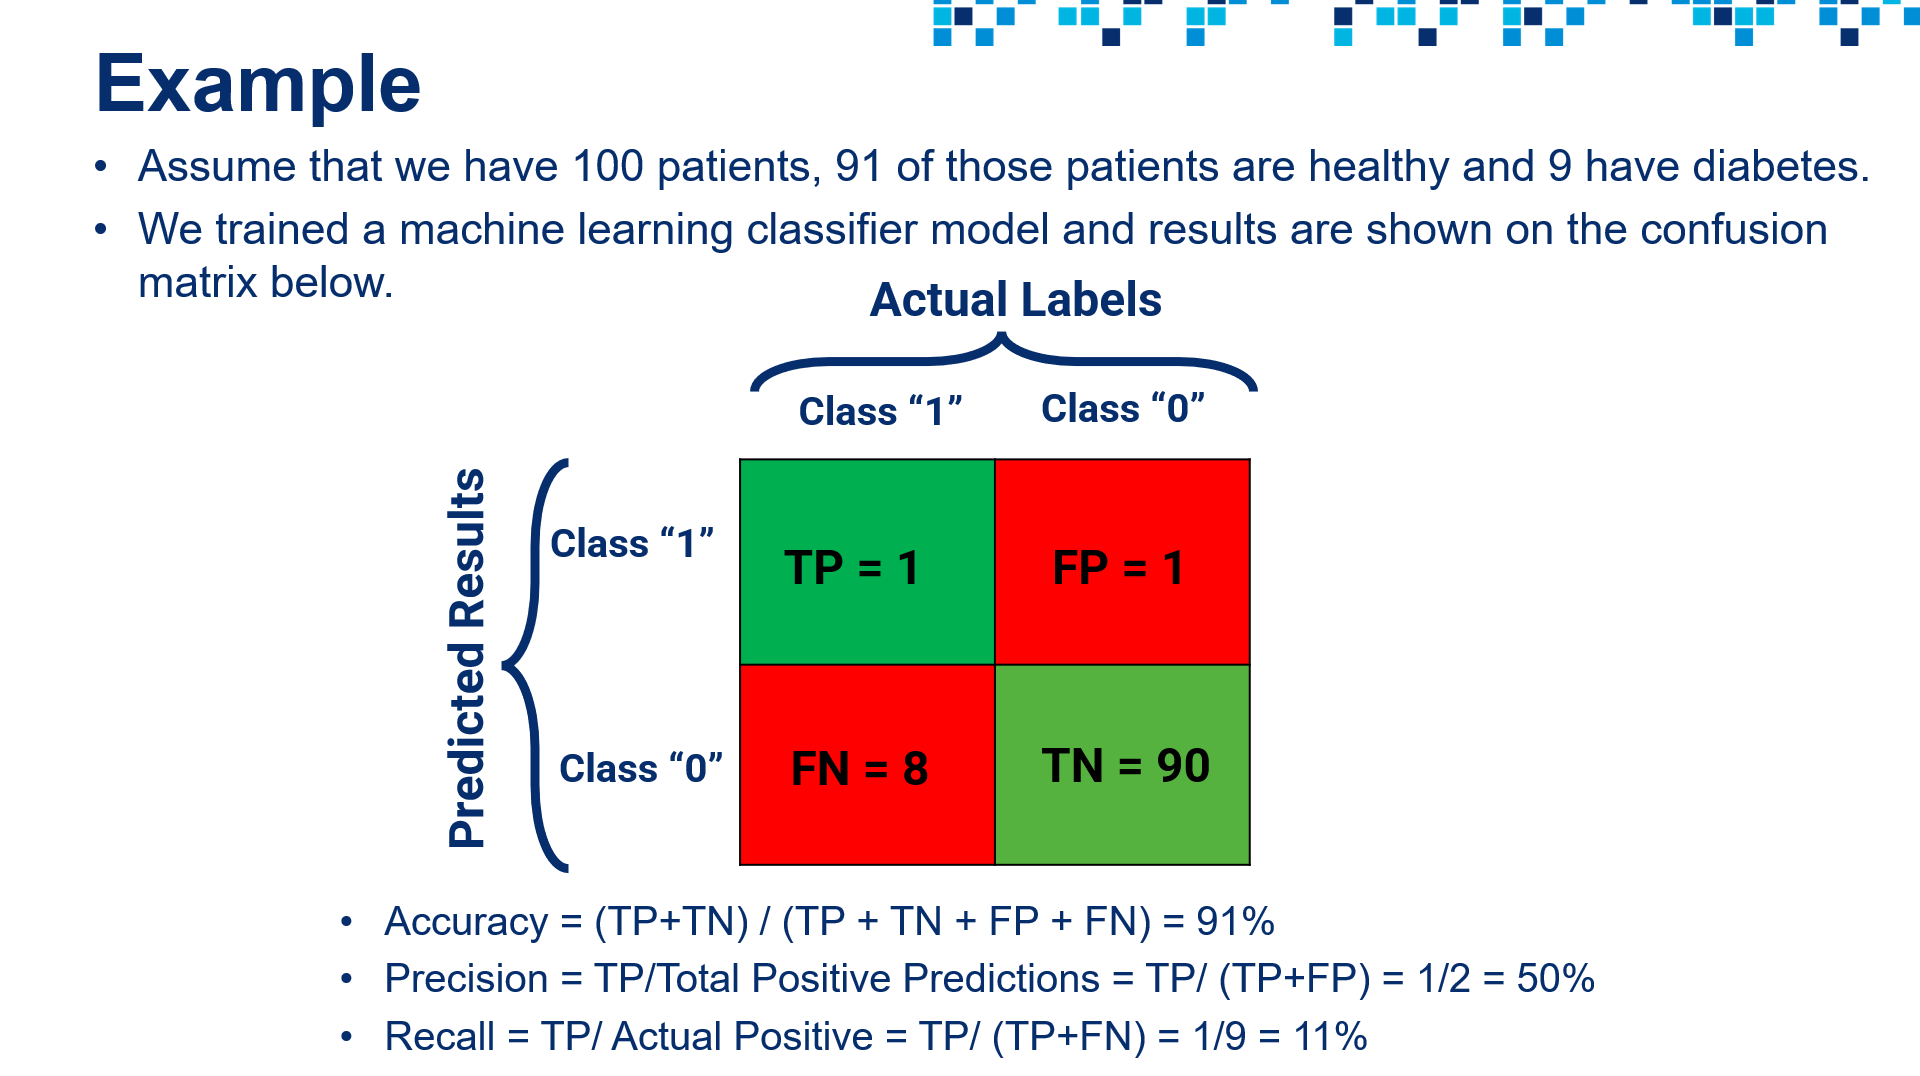

# EVALUATE TRAINED CLASSIFIER MODEL PERFORMANCE

In [ ]:
# Evaluate trained model performance using the test subset
results = model.evaluate(X_test, y_test)

In [ ]:
# Let's print the model accuracy 
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
# Generate predictions using the trained LSTM model
predictions = model.predict(X_test)
predictions

In [ ]:
# Let's convert probabilities into labels 0, 1, and 2 so we can compare them to the ground truth labels
# Argmax is used to obtain an array of indices of max values of a given array 
import numpy as np

y_predict = []

for i in predictions:
  y_predict.append(np.argmax(i))

y_predict

In [ ]:
# Let's display the ground truth data
y_test

In [ ]:
# Let's install Seaborn library which offers enhanced features compared to Matplotlib 
# Link: https://seaborn.pydata.org/
!pip install seaborn
import seaborn as sns

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

In [ ]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

**PRACTICE OPPORTUNITY:**
- **Change the architecture of the LSTM network by using 512 units instead of 64**
- **Retrain the network and recalculate the model accuracy**

# PERFORM SENTIMENT ANALYSIS USING PRE-TRAINED LANGUAGE MODELS

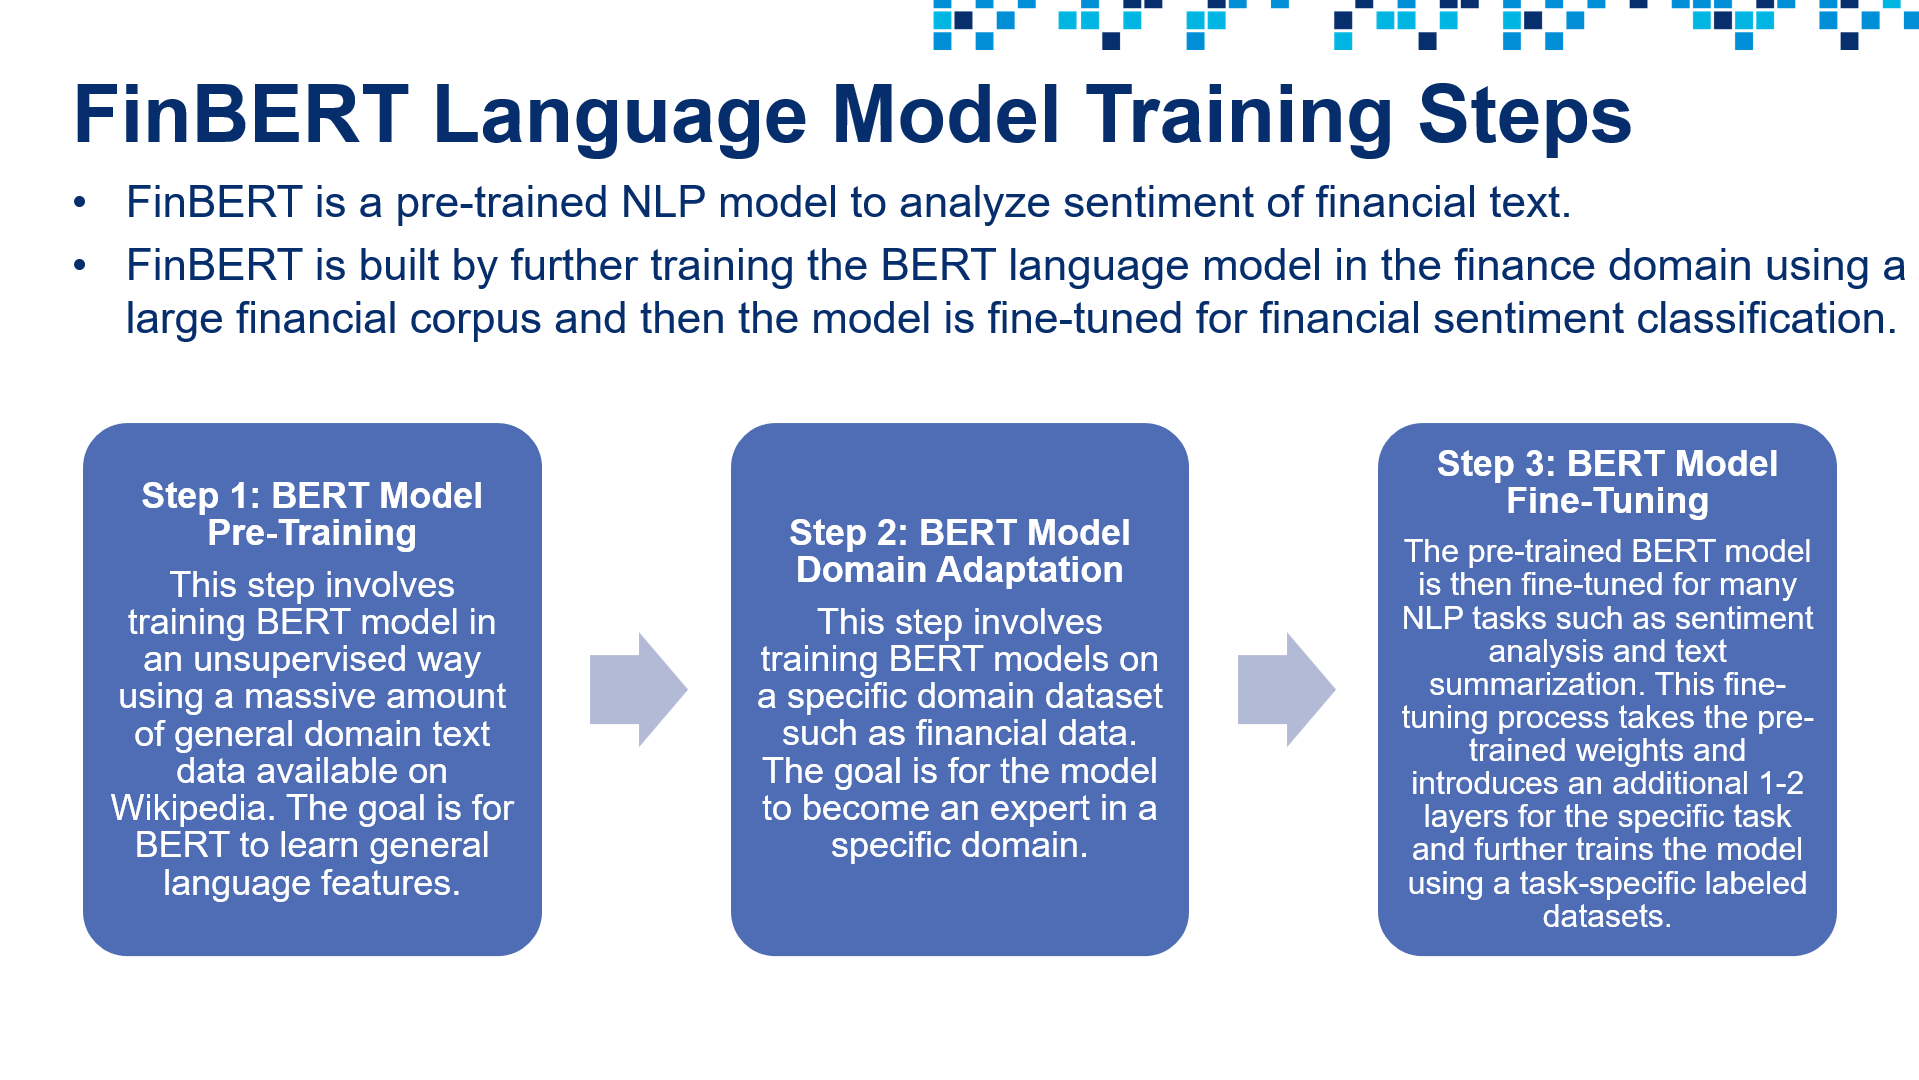

In [ ]:
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.2.0
# !pip uninstall transformer -y
# !pip install transformer==3.3.1

In [ ]:
# Disable tokenizer Parallelism 
# import os
# os.environ["TOKENIZERS_PARALLELISM"] = "false"

# !pip install tensorflow
# !pip install tensorflow==2.5.0 
# !pip install tensorflow-cpu
# !pip install transformer==3.3.1
# Let's install transformers (you can skip this line of code if you have transformers installed in a prior code cell)
# !pip install transformers
# !pip install transformers[torch]


In [ ]:
# Let's use pre-trained language models 
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from transformers import AutoTokenizer, pipeline
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("sentiment-analysis", model = "ProsusAI/finbert", tokenizer = tokenizer)

In [ ]:
# Let's test the pre-trained language model 
news_1 = "Finnish media group Talentum has issued a profit warning"
news_2 = "Amazon stock increased by 2%"
sentiment_pipeline(news_1)

In [ ]:
# Let's view a sample from our dataset in Pandas DataFrame df
df

In [ ]:
# Let's view the first row
df['Text'].tolist()[0]

In [ ]:
# Let's generate sentiment prediction using our pre-trained model 
sentiment_pipeline(df['Text'].tolist()[0])

In [ ]:
# Let's obtain the shape of the training set 
X_train.shape

In [ ]:
# Obtain the testing dataset 
test_df = df[X_train.shape[0] + X_val.shape[0]:].copy()
test_df

In [ ]:
# Let's generate sentiment using the testing text news dataset
test_df['pretrained_model_prediction'] = test_df['Text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [ ]:
# Let's display the DataFrame
test_df

In [ ]:
# Let's generate metrics by comparing model predictions to ground truth dataset
from sklearn.metrics import accuracy_score
print("Test Accuracy: {:.2f}%".format(accuracy_score(test_df['Label'], test_df['pretrained_model_prediction']) * 100))

**PRACTICE OPPORTUNITY:**
- **1. Using the hosted inference API available on Hugging Face, test the pre-trained FinBERT model using the following news text data:**
    - **"Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"**
    - **"Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just \\$231 million. That shareholding has since soared almost 50,000% in value to today’s \$114 billion"**
    - **"Amazon lost half its value this year as tech stocks got crushed and recession fears grew"**
    
- **2. Repeat task 1 using the sentiment_pipeline**

- **Hint: Link to Hugging Face API: https://huggingface.co/ProsusAI/finbert**

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**
- **Display the last 10 samples in the Pandas DataFrame df**
- **Perform a sanity check by displaying the last 10 rows data along with the corresponding label**

In [ ]:
# Use the tail() method to display the last 10 elements in the Pandas DataFrame
df.tail(10)

In [ ]:
# Let's display the length of the Pandas DataFrame
len(df)

In [ ]:
# Print the last 10 samples from the Pandas DataFrame and Perform a sanity check
for i in range(len(df)-10, len(df), 1):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

**PRACTICE OPPORTUNITY SOLUTION:**
- **Generate a word cloud visualization for text containing positive sentiment**

In [ ]:
# Generate word cloud visualization for text with positive sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'positive']['Cleaned Text']))

**PRACTICE OPPORTUNITY SOLUTION:**
- **Encode/Tokenize the following two statements:**
    - **"JPMorgan Sees 70% Upside for These 2 Auto Stocks in 2023"**
    - **"JPMorgan, Goldman Say Stocks Recovery Won’t Be Easy in 2023"**

In [ ]:
# Tokenize sample dataset #1
encoded_1 = tokenizer.encode("JPMorgan Sees 70% Upside for These 2 Auto Stocks in 2023")
print(encoded_1)

In [ ]:
# Tokenize sample dataset #2
encoded_2 = tokenizer.encode("JPMorgan, Goldman Say Stocks Recovery Won’t Be Easy in 2023")
print(encoded_2)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Perform tokenization and padding to the following text data:**
    - **"Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"**
    - **"Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just \\$231 million. That shareholding has since soared almost 50,000% in value to today’s \$114 billion"**
    - **"Amazon lost half its value this year as tech stocks got crushed and recession fears grew"**

In [ ]:
news_1 = "Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"
news_2 = "Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just $231 million. That shareholding has since soared almost 50,000% in value to today’s $114 billion"
news_3 = "Amazon lost half its value in 2022 as tech stocks got crushed and recession fears grew"

In [ ]:
# Let's encode the data first

from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

encoded_news_1 = tokenizer.encode(news_1)
encoded_news_2 = tokenizer.encode(news_2)
encoded_news_3 = tokenizer.encode(news_3)

In [ ]:
print(encoded_news_3)

In [ ]:
# Let's perform padding
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), torch.tensor(encoded_news_3)], batch_first = True, padding_value = 0).numpy()
padded_sequence

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Using Scikit-Learn library, split the data into 15% for testing, 15% for validation and 70% for training while enabling shuffling.** 
- **How many samples are present in the training, validation and testing subsets?**

In [ ]:
# Let's use Scikit-Learn to split the data into training, validation and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)


# Let's check out the shape of the training, validation and testing subsets 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Change the architecture of the LSTM network by using 512 units instead of 64**
- **Print the model summary**
- **How many trainable parameters does this new network have?**

In [ ]:
# 64 units: 23,665,859 trainable parameters 
# 512 units: 26,158,083 trainable parameters 

**PRACTICE OPPORTUNITY SOLUTION:**
- **Change the architecture of the LSTM network by using 512 units instead of 64**
- **Retrain the network and recalculate the model accuracy**

In [ ]:
# LSTM Test Accuracy with 64 units = 75.55%
# LSTM Test Accuracy with 512 units = 74.55%

**PRACTICE OPPORTUNITY SOLUTION:**
- **1. Using the hosted inference API available on Hugging Face (https://huggingface.co/ProsusAI/finbert), test the pre-trained FinBERT model using the following news text data:**
    - **"Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"**
    - **"Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just \\$231 million. That shareholding has since soared almost 50,000% in value to today’s \$114 billion"**
    - **"Amazon lost half its value this year as tech stocks got crushed and recession fears grew"**
    
- **2. Repeat task 1 using the sentiment_pipeline**

In [ ]:
# Let's test the pre-trained language model 
news_1 = "Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"
news_2 = "Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just $231 million. That shareholding has since soared almost 50,000% in value to today’s $114 billion"
news_3 = "Amazon lost half its value this year as tech stocks got crushed and recession fears grew"

sentiment_pipeline(news_3)

# EXCELLENT JOB!